In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothicCoding')
sns.set(font='NanumGothicCoding')

# 1. 분석 주제 및 목적

---

- 최근 힙합의 인기는 떨어지고 밴드의 인기가 올라가고 있는 것 같다.
- 그게 과연 사실인지 알아보기 위해 주제 선정
- 해당 장르의 인기를 가장 쉽게 알아볼 수 있는 음원 차트 분석
- 해당 장르의 구매력을 알 수 있는 공연 판매량 분석
- 젊은 층에서 해당 장르를 얼마나 선호하는 지 알기 위해 대학 축제 참여 아티스트 목록 분석

# 2. 가설 설정

- 지난 몇 년간 힙합의 인기가 저물었다.
- 힙합이 음원 순위, 공연에서 차지하는 비중이 낮아졌을 것이다.
- 반대로 최근 넷상이나 주변에서 밴드 음악을 즐겨듣는 사람이 많아지는 것 같은데 이것이 단순히 내 주변의 편향이 아니라면 밴드음악에 관한 관심도가 올랐을 것이다.
- 밴드에 대한 관심도가 올랐다면 음원 순위, 공연 등에서 밴드가 차지하는 비중이 높아졌을 것이다.

# 3. 데이터 출처

---

- **음원 차트**: [멜론](https://www.melon.com/)
- **공연 통계: [KOPIS 공연예술 통합전산망](https://www.kopis.or.kr/por/main/main.do)**
- **대학 축제 출연 아티스트 목록**: 데이터셋은 없고 가진 건 시간뿐이라…

# 4. 결과

---

### 밴드의 대중화?

- 보이그룹의 약세
- 데이식스, 엔플라잉 등의 보이밴드들이 기존 보이 그룹+밴드 느낌으로 대중들에게 인기를 얻었을 수 도 있을 것 같음
- 잔나비, QWER 등

### 힙합의 몰락?

- 기존 힙합의 대중화에 큰 기여를 한 쇼미더머니
- 쇼미더머니 흥행 이후 힙합이 대세가 되었으나 그에 피로감을 느낀 대중들이 늘어나며 이후 하락세
- 쇼미더머니 7 이후로 꾸준히 하락세를 겪다가 2022년에 결국 종영
- 쇼미더머니 종영 이후 힙합에 대한 대중의 관심이 크게 줄어듦

In [2]:
bands = set(['10cm','나상현씨밴드','넬','너드커넥션','데이식스','루시','소란','식구','씨엔블루','쏜애플','실리카겔','앰퍼샌드원','원위','유다빈밴드','엔플라잉','잔나비','체리필터','트랜스픽션','페퍼톤스','한로로','FT아일랜드','QWER','wave to earth','YB'])
rappers = set(['기리보이','김하온','김승민','다이나믹듀오','래원','로꼬','리듬파워','릴보이','미란이','박재범','비오','비와이','블랙나인','빈지노','신스','슈퍼비','원슈타인','우원재','언에듀케이드키드','우디고차일드','에픽하이','이영지','지코','재쓰비','저스디스','제시','창모','쿠기','키코','한요한','호미들','행주','우원재','ph-1','SZN','SC4F & MADII','그레이','양홍원','원슈타인'])
idols = set(['NCT DREAM','NCT WISH','TNX','라잇썸','비비지','산다라박','세이마이네임','스테이씨','아이들','아이브','아일릿','에스파','에이핑크','엔믹스','ITZY','웬디','유니스','이창섭','이채연','최예나','트리플에스','키스오브라이프','캐치더영','츄','권은비','하이라이트','프로미스나인','르세라핌','청하','시그니처','WOO!AH!','조유리','소미','위너','현아'])

## 데이터로 보는 밴드 붐

### 대학 축제에서의 밴드

In [3]:
list_2022 = 'ITZY,윤하,박혜원,지코,DVWN,에일리,10cm,ITZY,10cm,재만,픽보이,규현,타이거JK&윤미래&비지,준케이,잔나비,다이나믹듀오,윤하,폴킴,경서,정유진,저스디스,CL,김범수,ITZY,지코,거미,DVWM,콜드,안병웅,카키,10cm ,볼빨간 사춘기,이하이,아이브,사이먼 도미닉,그레이,쿠기,지코,DVWN,빅나티,민경훈,펀치,아이브,프로미스나인,오다온,황민현,비비,리듬파워,최현우,울랄라세션,펀치,로꼬,10cm,다비치,멜로망스,윤하,지코,DVWN,다이나믹듀오,MFBTY,볼빨간 사춘기,잔나비,아이브,아이브,비비,보라미유,릴보이,타이거JK,윤미래,비지,보라미유,아이브,비오,헤이즈,마린,블랙나인,빌리,원슈타인,블랙나인,마린,호미들,릴김치,윤하,다비치,윤하,비오,호미들,헤이즈,먼데이키즈,아이브,경서예지,릴러말즈,크랙실버,기리보이,트랜트픽션,프로미스나인,홀리뱅,ph-1,싸이,헤이즈,키드밀리,기리보이,스테이씨,위너,볼빨간사춘기,싸이,보라미유,허각,김보경,비와이,기리보이,지플랫,현아,보라미유,유토,릴보이,비비,보라미유,여자아이들,싸이,싸이,닐로,헤이즈 ,윤하,비와이,비비,유토,보라미유,잔나비,에스파,악동뮤지션,지코,비비,윤미래,아이브,위너,비오,트와이스,10cm,프로미스나인,잔나비,싸이,에스파,잔나비,다이나믹 듀오,지코,체리콕,싸이,황인욱,YB,빅마마,경서예지,임창정,현아,키드밀리,저스디스,기리보이,보라미유,현아,에일리,여자아이들,제시,지코,싸이,잔나비,제시,멜로망스,비오,싸이,호미들,메이져스,보라미유,싸이,제시,임창정,거미,호미들,수퍼비,비오,베이식,10cm,여자아이들,보라미유,아이브,싸이,이예준,저스디스,키드밀리,현아,산이,브레이브걸스,위너,거미,먼데이키즈,현아,펀치,헤이즈,스테이씨,DJ미노,신스,체리콕,MC섭이네,폴킴,재만,다비치,박혜원,PLUTO,SARAH,현아,사이먼 도미닉,리듬파워,먼데이키즈,경서예지&전건호,케이시,10cm,윤하,다비치,멜로망스,지코,다운,다이나믹 듀오,볼빨간 사춘기,잔나비,ITZY,HYNN,윤하,지코,10cm,에일리,Dvwn,한요한,아이브,류수정,한요한,아이브,류수정,윤하,잔나비,스테이씨,다이나믹 듀오,10cm,볼빨간 사춘기,아이브,쿠기,그레이,사이몬 도미닉,아이브,쌈디,다비치,류수정,우주소녀,박보람,21학번,멜로망스,한요한,아이브,류수정'

In [4]:
artists = {}
genres = []
for name in list_2022.split(','):
    if name not in artists:
        artists[name] = 1
        if name in bands:
            genres.append('밴드')
        elif name in rappers:
            genres.append('힙합')
        elif name in idols:
            genres.append('아이돌')
        else:
            genres.append('기타')
    else:
        artists[name] += 1

artists_2022 = pd.DataFrame({'artist': artists.keys(), 'num': artists.values(), 'genre': genres})

In [5]:
artists_2022

,artist,num,genre
0,ITZY,4,아이돌
1,윤하,9,기타
2,박혜원,2,기타
3,지코,9,힙합
4,DVWN,3,기타
...,...,...,...
109,사이몬 도미닉,1,기타
110,쌈디,1,기타
111,우주소녀,1,기타
112,박보람,1,기타


In [6]:
list_2024 = '유니스,10cm,르세라핌,창모,QWER,창모,스탠딩에그,윤하,에이핑크,르세라핌,프로미스나인,에일리,윤하,기리보이,씨엔블루,에이핑크,비,비와이,Tabber,원슈타인,화사,하이라이트,프로미스나인,소란,치즈,장기하,김승민,래원,최예나,볼빨간사춘기,라잇썸,권은비,지코,안녕,다비치,선미,하이라이트,행주,스테이씨,SURL,소미,지코,하하,10cm,지코,카더가든,에이핑크,크라잉넛,한로로,청하,로꼬,루시,멜로망스,장기하,LIGHTSUM,민경훈,청하,스테이씨,비와이,다비치,프로미스나인,지코,폴킴,시그니처,권은비,청하,최예나,로이킴,볼빨간사춘기,엔플라잉,이영서,도리,폴블랑코,조유리,더윈드,하이라이트,우디,더윈드,르세라핌,하이라이트,트리플에스,민경훈,저스디스,르세라핌,비오,최유리,유니스,여동생YDS,HOOK,로이킴,에이핑크,크리스피,글렌체크,권은비,최유리,거미,백예슬,터치드,안녕,태버,체리필터,루시,스텔라장,먼데이키즈,페퍼톤스,다섯,한로로,순순희,프로미스나인,백지영,노라조,비오,이무진,오반,오마이걸,창모,키스오브라이프,스테이씨,권은비,호미들,WOO!AH!,MC섭이,비비지,BAND1225,비와이,QWER,비와이,매드크라운,소유,유다빈밴드,호미들,김나영,볼빨간사춘기,로꼬,우원재,비비지,헤이즈,비오,우디,유정석,창모,잔나비,ph-1,우디고차일드,빅나티,박재범,싸이,창모,화사,최예나,안신애,다니엘지칼,싸이,아일릿,잔나비,데이식스,싸이,창모,애쉬아일랜드,잔나비,최유리,유다빈밴드,설하윤,김필선,10cm,미란이,라이즈,아이브,ITZY,싸이,지코'

In [7]:
artists = {}
genres = []
for name in list_2024.split(','):
    if name not in artists:
        artists[name] = 1
        if name in bands:
            genres.append('밴드')
        elif name in rappers:
            genres.append('힙합')
        elif name in idols:
            genres.append('아이돌')
        else:
            genres.append('기타')
    else:
        artists[name] += 1

artists_2024 = pd.DataFrame({'artist': artists.keys(), 'num': artists.values(), 'genre': genres})

In [8]:
artists_2024

,artist,num,genre
0,유니스,2,아이돌
1,10cm,3,밴드
2,르세라핌,4,아이돌
3,창모,6,힙합
4,QWER,2,밴드
...,...,...,...
103,김필선,1,기타
104,미란이,1,힙합
105,라이즈,1,기타
106,아이브,1,아이돌


In [9]:
list_2025 = '5.26(월) 엔플라잉,5.27(화) 이영지 / 키코,5.28(수) 스테이씨 / 루시 / 권진아,동의대,5.26(월) 메이딘 / 한승우 / 허각 / 화사 / 헤이즈 ,5.27(화) HITGS / DJ 수빈 / QWER / TNX / 싸이 ,경국대,5.26(월) 하동균 / 길구봉구 / YB,5.27(화) 리센느 / 케플러 / 자이언티,전주대,5.27(화) 정승환 / 체리필터 / 루시 / 지소쿠리클럽,5.28(수) 김승민 / 다이나믹듀오 / 호미들 / SZN / SC4F & MADII,5.29(목) 헤이즈 / 엔플라잉 / 웬디 / 이하이,교원대,5.22(목) 호미들 / 한동근 / 청하 ,5.23(금) 21학번,광운대,5.21(수) 트리플에스 / 카더가든,5.22(목) 최예나 / 기리보이 / 지코,5.23(금) 10cm / 유다빈밴드 / 엔플라잉,경민대,5.22-23 애쉬아일랜드 / 비비지 / 리센느 ,경인여대,5.21(수) 앰퍼샌드원 / ph-1 / 엔플라잉 / 빌리 ,한국기술교육대,5.15(목) 양다일 / 호미들,5.16(금) 효린 / 미야오 ,청주대,5.20(화) 메이딘 / TNX / 다이나믹듀오 / 싸이 ,5.21(수) 인어미닛 / 미야오 / 우디 / QWER ,서강대,5.15(목) 인어미닛 / 메이딘 / 한승우 / 아일릿 / 크러쉬,5.16(금) 예은 / TNX / 힛지스 / 리센느 / 싸이 ,배재대,5.12(월) 안신애 / 유니스 / TNX,5.13(화) 길구봉구 / 하동균 / 싸이,구미대,5.13(화) 피프티피프티 / 싸이 / TNX / 안신애,5.14(수) 비와이 / 규빈 / 백호 / 윤마치 / 루시 ,한국체육대,5.15(목) 한요한 / YB,5.16(금) 키스오브라이프 / 슈퍼비 / 언에듀케이티드 키드 ,홍익대 (서울),5.14(수) 키키 / 창모 / 빈지노,5.15(목) 심아일랜드 / 메이딘 / 이승윤,5.16(금) 잔나비 / YB / 에스파 / 싸이,홍익대 (세종),5.15(목) 김승민 / 창모 / 카더가든 ,5.16(금) 최예나 / 하이키 / 정예원 ,단국대 (죽전) ,5.13(화) ph-1 / 릴보이 ,5.14(수) 10cm / 엔플라잉 / 권은비,5.15(목) 안신애 / 키키 / 박재범 ,단국대(천안),5.7(수) 키스오브라이프 / 메이딘 / 키노 / 다비치,5.8(목) 잔나비 / 싸이 / TNX / 타이거 JK & 윤미래,순천향대,5.7(수) 윤마치 / 권은비 / YB,5.8(목) 호미들 / 애쉬 아일랜드,5.9(금) 로이킴 / 다비치 / 루시,호서대,5.7(수) 멜로망스 / 키스오브라이프 / 한요한 / 권은비,5.8(목) 아이칠린 / 애쉬아일랜드 / 최유리 / 다이나믹듀오 / 비와이,인천대,5.7(수) 식구 / 루시 / 엔플라잉,5.8(목) 안신애 / 싸이 / 이젤 / 키키,5.9(금) 신스 / 거미 / 다이나믹 듀오 ,경복대,5.8(목)엔젤노이즈,5.9(금) 우원재 / 10cm,추계예술대,5.9(금) 비와이 / 시소,상명대,5.8(목) 김혜림 / 서인국 / 이무진,5.9(금) 청하 / 싸이 / 마크툽 ,성균관대 인문캠,5.8(목) 키키 / 안신애 / 키스오브라이프 / YB,5.9(금) 아이브 / 잔나비 / 싸이,성균관대 자연캠,5.15(목) 유다빈밴드 / 최예나 / 비비지 / 10cm,5.16(금) 윤마치 / 릴보이 / 빅나티 / 권은비 / 크러쉬,서울대 봄축제,5.15(목) 빌리 / 루시 / 다이나믹듀오,서경대,5.8(목) 빅나티 / 권은비 / 카더가든,5.9(금) YB / ITZY / DJ pastello,원광대,5.12(월) 루시 / 나상현씨밴드 / 유다빈밴드 / QWER ,5.13(화) 이즈나 / 홀리뱅 / 이창섭 / 쿠기 / 그레이 / 애쉬 아일랜드 / TIOT,성서대,5.13(화) 우디 / 김승민 / 캐치더영 ,한국항공대,5.13(화) 트랜스픽션 / YB,5.14(수) 최예나 / 스테이씨,세종대,5.14(수) 로시 / 잔나비 / 엔믹스,5.15(목) 스컬&하하 / 키스오브라이프 / 지코,5.16(금) 나상현씨밴드 / 에이핑크 / 하이라이트,가천대,5.14(수) 권은비 / 크러쉬 / 산다라박 / 다이나믹 듀오 / 지원 / 백호 / 리센느 / 청하 ,김천대학교,5.14(수) 스탠업 / 래원,5.15(목) 이창섭 / 박혜원,이화여자대학교,5.16(금) 재쓰비 / 너드커넥션 / 다비치 / 미란이,남서울대,5.13(화) 리센느 / 창모 / 스테이씨 / 10cm ,5.14(수) 엔젤노이즈 / 넬 / 권은비 / 볼빨간사춘기,한라대,5.13(화)권은비 / 행주,5.14(수) 리센느 / 애쉬 아일랜드,한세대,5.13(화) 규빈 / 김수영 / 카더가든 / 루시,5.14(수) 경서예지 / 한요한 / KINO / 에이핑크,여주대,5.13(화) 언에듀케이드키드 / 슈퍼비 / 호미들,5.14(수) 엔믹스 ,세명대,5.14~5.16 화사 / 싸이 / TNX ,서울 과기대,5.14(수) 지코 / 10cm,5.15(목) 권은비 / 기리보이,5.16(금) ITZY / 백예린 ,한성대,5.15(목) 로시 / 우원재 / 이하이,5.16(금) 유니스 / 넬 / 체리필터 / 비비지,배화여자대학교,5.15(목) 소란 / 아일릿 / 나상현씨밴드,군산대,5.14(수) 유다빈밴드 / 신스 / 다이나믹 듀오,5.15(목) 리센느 / 윤하 / 김승민,창신대,5.15(목) 유니스 / 청하 ,인하대,5.14(수) 안신애 / 최예나 / YB / ITZY,5.15(목) 비비지 / 빅나티 / 에일리 / 잔나비,5.16(금) 창모 / 선미 / 에픽하이,경희대,5.14(수) 키키 / 로이킴 / 박재범,5.15(목) 루시 / 엔플라잉 / 빈지노 / 백예린,5.16(금) 폴킴 / 투어스 / ITZY,전북대,5.21(수) YB / 나상현씨밴드 / 로시 / 지미브라운 / TIOT,5.22(목) 이영지 / 스컬&하하 / 키코 / 인어미닛 / 이민정,5.23(금) 키키 / 권은비 / 이프아이 / TNX,제주대,5.20(화) 루시 / 윤마치,5.21(수) 도리 / 헤이즈,5.22(목) 케플러 / 백호 / 너드커넥션,건국대,5.20(화) 김수영 / 카더가든 / 잔나비,5.21(수) wave to earth / 에스파 / 다이나믹듀오 / 백예린,5.22(목) ITZY / YB / 싸이,협성대,5.21(수) 안신애 / 화사,5.22(목) 윤마치 / 루시 ,한남대,5.19(월) 하이라이트 / 츄,5.20(화) 스테이씨 / YB ,5.21(수) 권은비 / 멜로망스 ,경남대,5.20(화) 이창섭 / 케이시,5.21(수) 스테이씨 ,5.22(목) 황인욱 / 범진 ,서울시립대,5.19(월) 원위 / 최예나,5.20(화) QWER,5.21(수) 윤하 / 투어스 ,용인예술과학대,5.22(목) 비오 / 양다일 / 이승윤 ,호원대,5.19(월) 이창섭 / 한요한,5.20(화) 이하이 / 마린 / 블랙나인 ,동아방송예술대,5.29(목) 최유리 / 카더가든 / 권은비,5.30(금) 캐치더영 / 김수영 / 이창섭 / 키노 / 하이라이트,선문대학교,5.21(수) QWER / 너드커넥션 / 이창섭,5.22(목) 빅나티 / 리센느 / 청하 / 이무진,한국외대 서울캠퍼스,5.19(월) 비투비 / 선미 / YB,5.20(화) 윤하 / 트랜스픽션 / 백예린,우송대,5.19(월) 카더가든 / 창모 / 리센느,5.20(화) 메이딘 / 키노 / 싸이 ,동양미래대,5.16(금) 리센느 / 이채연 / 원위 / 세이마이네임 / 로이킴,경성대,5.20(화) 박혜원 / 기리보이 / 레게 강 같은 평화,5.21(수) 정승환 / 원슈타인 / 에프티아일랜드 ,숭실대,5.21(수) 지코 ,5.22(목) 잔나비 / NCT WISH,5.23(금) 백예린 / 아이들 ,수원대,5.22(목) 다비치 / 권은비 / 다이나믹 듀오,5.23(금) 안신애 / 윤하 / 츄 / 창모,한밭대,5.21(수) 우디 / DK,5.22(목) 리센느 / 이창섭 ,5.23(금) FT아일랜드,중앙대,5.21(수) 쏜애플 / 에스파 / 정동원,5.22(목) 행주 / 창모 / 스테이씨 / 나상현씨밴드,5.23(금) 다이나믹듀오 / YB / NCT DREAM,대구대,5.19(월) 백호 / QWER,5.20(화) 이창섭 / 볼빨간사춘기,5.21(수) 양홍원 / 스테이씨,금오공대,5.20(화) 라잇썸,5.21(수) 츄 / 하이키 / 트랜스픽션,연세대 (무악대동제),5.29(목)-30(금) 이적 / 장기하 / 10cm / 카더가든 / 실리카겔 / 이승윤 / 나상현씨밴드 / 스텔라장 / 소수빈 / 정세운 / 윤마치 / 리도어,서울여자대학교,5.22(목) 유다빈밴드,5.23(금) 이채연 ,가톨릭대,5.21(수) 이영지 / 최예나 / 키코,5.22(목) 엔플라잉 / 크러쉬,5.22(목),국민대,5.20(화) 최예나 / 키스오브라이프 / 빈지노,5.21(수) 하하 / 자이언티 / 리센느,강남대,5.21(수) 김수영 / 이승윤 / 창모 / 신스,5.22(목) 이프아이 / 루시 / 키키 / 에프티아일랜드,조선대,5.28(수) 이즈나 / 창모 / 잔나비 / 싸이,5.29(목) 권진아 / QWER / 윤마치 / 로이킴,5.30(금) 홀리뱅 / 백호 / 지코 ,순천대,5.28(수) 싸이 / 너드커넥션 / 현서,5.29(목) 백호 / 헤이즈 / QWER,동국대,5.28(수) 카더가든 / 빈지노 / 엔시티 드림 / 크러쉬,5.29(목) 키스오브라이프 / 다이나믹듀오 / 씨엔블루 / 윤하,명지대 ,5.26(월) 김승민 / 아이들 / 폴킴 ,5.27(화) 기리보이 / 양다일 / 청하,연세대(미래캠),5.28(수) 키스오브라이프 / 이창섭 / 소향 / 유니스,5.29(목) 제나 설 / 장현승 / 인어미닛 / 루시 / 스테이씨 ,부경대,5.27(화) 스테이씨 / 한요한,5.28(수) 에이핑크 / 로이킴 ,5.29(목) 유다빈밴드 / 김하온 / ph-1'

In [10]:
chunks = list_2025.split(',')

In [11]:
artists = {}
genres = []
for chunk in chunks:
    if chunk[0] != 5:
        pass
    names = chunk[len(chunk.split(' ')[0]):].split('/')
    for name in names:
        temp = name.strip()
        if temp not in artists:
            artists[temp] = 1
            if temp in bands:
                genres.append('밴드')
            elif temp in rappers:
                genres.append('힙합')
            elif temp in idols:
                genres.append('아이돌')
            else:
                genres.append('기타')
        else:
            artists[temp] += 1

artists_2025 = pd.DataFrame({'artist': artists.keys(), 'num': artists.values(), 'genre': genres})

In [12]:
artists_2025

,artist,num,genre
0,엔플라잉,8,밴드
1,이영지,3,힙합
2,키코,3,힙합
3,스테이씨,9,아이돌
4,루시,13,밴드
...,...,...,...
188,씨엔블루,1,밴드
189,소향,1,기타
190,제나 설,1,기타
191,장현승,1,기타


([<matplotlib.patches.Wedge at 0x1ffd8f8f490>,
 [Text(1.076333690430432, 0.2269488639416541, '밴드'),
  Text(0.7413574394994955, 0.8126433085301029, '아이돌'),
  Text(-0.2987462010905635, 1.0586551408905343, '힙합'),
  Text(-0.37552011345240044, -1.033917136134563, '기타')],
 [Text(0.5870911038711446, 0.12379028942272038, '6.6%'),
  Text(0.40437678518154296, 0.44325998647096515, '13.2%'),
  Text(-0.1629524733221255, 0.577448258667564, '19.1%'),
  Text(-0.2048291527922184, -0.5639548015279434, '61.1%')])

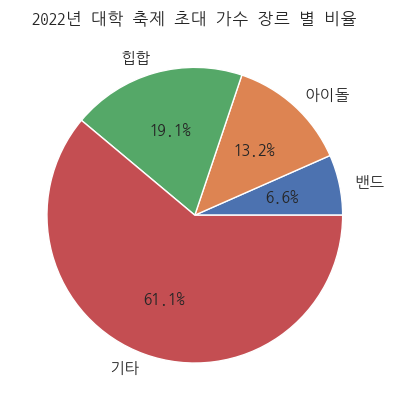

In [13]:
genres = ['밴드','아이돌','힙합','기타']

genre_sum = [artists_2022[artists_2022['genre']==genre]['num'].sum() for genre in genres]

plt.title("2022년 대학 축제 초대 가수 장르 별 비율")
plt.pie(genre_sum, labels = genres, autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x1ffdb163ed0>,
 [Text(1.0265759166028492, 0.3951479310979879, '밴드'),
  Text(0.05050495899212386, 1.098839956097886, '아이돌'),
  Text(-1.0733760615733534, 0.24054901879092513, '힙합'),
  Text(0.21088185603061754, -1.0795966111456083, '기타')],
 [Text(0.5599504999651904, 0.21553523514435702, '11.7%'),
  Text(0.027548159450249375, 0.599367248780665, '25.1%'),
  Text(-0.5854778517672836, 0.13120855570414097, '19.3%'),
  Text(0.11502646692579137, -0.5888708788066954, '43.9%')])

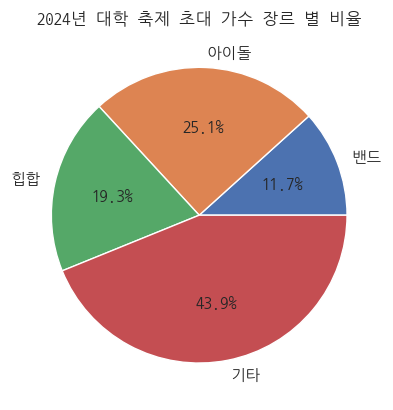

In [14]:
genres = ['밴드','아이돌','힙합','기타']

genre_sum = [artists_2024[artists_2024['genre']==genre]['num'].sum() for genre in genres]

plt.title("2024년 대학 축제 초대 가수 장르 별 비율")
plt.pie(genre_sum, labels = genres, autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x1ffdb1c1550>,
 [Text(0.9797139861808524, 0.5001604795279458, '밴드'),
  Text(0.09507293720226642, 1.0958837240381545, '아이돌'),
  Text(-0.8540734861956337, 0.693223254210097, '힙합'),
  Text(-0.13523305358507845, -1.0916556330721037, '기타')],
 [Text(0.5343894470077376, 0.2728148070152432, '15.0%'),
  Text(0.05185796574669077, 0.597754758566266, '17.2%'),
  Text(-0.46585826519761836, 0.3781217750236892, '13.9%'),
  Text(-0.07376348377367914, -0.5954485271302383, '53.9%')])

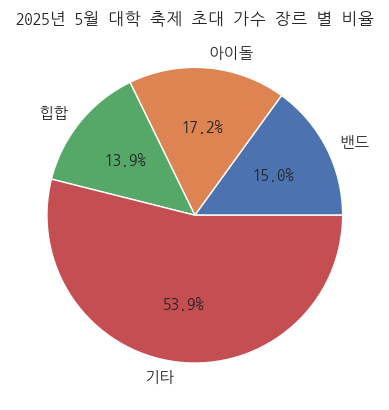

In [15]:
genres = ['밴드','아이돌','힙합','기타']

genre_sum = [artists_2025[artists_2025['genre']==genre]['num'].sum() for genre in genres]

plt.title("2025년 5월 대학 축제 초대 가수 장르 별 비율")
plt.pie(genre_sum, labels = genres, autopct='%.1f%%')

- 대학 축제에 참가하는 밴드들의 비율이 해마다 상승 중
- 반대로 래퍼들의 비율은 크게 감소
- 아이돌과 발라더의 꾸준한 수요
- 기존 래퍼들의 빈자리를 밴드가 채워가는 것 같음

**2022년 대학 축제 출연 횟수 Top 5**

| 아이브 | 13회 |
| --- | --- |
| 싸이 | 10회 |
| 윤하 | 9회 |
| 지코 | 9회 |
| 보라미유 | 9회 |

**2024년 대학 축제 출연 횟수 Top 5**

| 창모 | 6회 |
| --- | --- |
| 지코 | 5회 |
| 싸이 | 4회 |
| 르세라핌 | 4회 |
| 프로미스나인 | 4회 |

**2025년  대학 축제 출연 횟수 Top 5(2025년 5월 데이터만 수집)**

| 싸이 | 15회 |
| --- | --- |
| 루시 | 13회 |
| YB | 13회 |
| 권은비 | 12회 |
| 리센느 | 12회 |
- 2025년에는 루시와 YB가 함께 Top 5에 들며 과거부터 활동해온 밴드와 비교적 최근에 활동을 시작한 밴드 모두 수요가 있음을 알 수 있음
- 2025년에는 Top 5에 힙합 자체가 없음
- 대학 축제 출연은 가격이나 활동 일정 등의 영향도 받긴하겠지만, 20대 층에서 밴드 음악에 대한 관심도가 올라간다는 것을 보여줄 수 있음

### 음원 차트에서의 밴드

In [16]:
melon_chart_now = '1,1,너에게 닿기를,10cm,너에게 닿기를,좋아요 81591$2,OO-LI - 페이지 이동,Drowning,WOODZ,OO-LI,좋아요 198762$3,모르시나요 - 페이지 이동,모르시나요(PROD.로코베리),조째즈,모르시나요,좋아요 73784$4,Ruby - 페이지 이동,like JENNIE,제니,Ruby,좋아요 80959$5, 1,Übermensch - 페이지 이동,TOO BAD (feat. Anderson .Paak),G-DRAGON,Übermensch,좋아요 147413$6, 1,나는 반딧불 - 페이지 이동,나는 반딧불,황가람,나는 반딧불,좋아요 143380$7,어제보다 슬픈 오늘 - 페이지 이동,어제보다 슬픈 오늘,우디 (Woody),어제보다 슬픈 오늘,좋아요 25357$8,HOME SWEET HOME (feat. 태양 대성) - 페이지 이동,HOME SWEET HOME (feat. 태양 대성),G-DRAGON,HOME SWEET HOME (feat. 태양 대성),좋아요 212703$9, 1,오늘만 I LOVE YOU - 페이지 이동,오늘만 I LOVE YOU,BOYNEXTDOOR,오늘만 I LOVE YOU,좋아요 147140$10, 1,Whiplash - The 5th Mini Album - 페이지 이동,Whiplash,에스파,Whiplash - The 5th Mini Album,좋아요 134204$11,교회오빠 - 페이지 이동,Flower,오반(OVAN),교회오빠,좋아요 47544$12,IVE EMPATHY - 페이지 이동,REBEL HEART,아이브,IVE EMPATHY,좋아요 100212$13, 1,APT. - 페이지 이동,APT.,로제 Bruno Mars,APT.,좋아요 212456$14, 1,Fourever - 페이지 이동,HAPPY,데이식스,Fourever,좋아요 190955$15, 1,MY LOVE(2025) - 페이지 이동,MY LOVE(2025),이예은 아샤트리 전건호,MY LOVE(2025),좋아요 19820$16, 2,HOT - 페이지 이동,HOT,르세라핌,HOT,좋아요 37310$17,만화 (滿花) - 페이지 이동,청춘만화,이무진,만화 (滿花),좋아요 59821$18, 2,ODYSSEY - The 1st Album - 페이지 이동,Fly Up,RIIZE,ODYSSEY - The 1st Album,좋아요 33933$19, 3,언젠가는 슬기로울 전공의생활 OST Part 9 - 페이지 이동,그날이 오면,투모로우바이투게더,언젠가는 슬기로울 전공의생활 OST Part 9,좋아요 22665$20, 1,The Book of Us : Gravity - 페이지 이동,한 페이지가 될 수 있게,데이식스,The Book of Us : Gravity,좋아요 352737$21, 6,신사와 아가씨 OST Part.2 - 페이지 이동,사랑은 늘 도망가,임영웅,신사와 아가씨 OST Part.2,좋아요 226727$22, 1,내게 사랑이 뭐냐고 물어본다면 - 페이지 이동,내게 사랑이 뭐냐고 물어본다면,로이킴,내게 사랑이 뭐냐고 물어본다면,좋아요 71935$23, 2,천상연 (웹툰 선녀외전 X 이창섭 (LEE CHANGSUB)) - 페이지 이동,천상연,이창섭,천상연 (웹툰 선녀외전 X 이창섭 (LEE CHANGSUB)),좋아요 126846$24, 3,Fourever - 페이지 이동,Welcome to the Show,데이식스,Fourever,좋아요 178131$25, 1,선재 업고 튀어 OST Part 1 - 페이지 이동,소나기,이클립스,선재 업고 튀어 OST Part 1,좋아요 181173$26, 7,MY EYES OPEN VVIDE - 페이지 이동,HANDS UP,MEOVV (미야오),MY EYES OPEN VVIDE,좋아요 14649$27, 1,미치게 그리워서 - 페이지 이동,미치게 그리워서,황가람,미치게 그리워서,좋아요 27844$28, 9,천국보다 아름다운 - 페이지 이동,천국보다 아름다운,임영웅,천국보다 아름다운,좋아요 30832$29,Die With A Smile - 페이지 이동,Die With A Smile,Lady Gaga Bruno Mars,Die With A Smile,좋아요 94674$30, 5,IVE EMPATHY - 페이지 이동,ATTITUDE,아이브,IVE EMPATHY,좋아요 58068$31, 5,rosie - 페이지 이동,toxic till the end,로제,rosie,좋아요 112842$32, 8,IM HERO - 페이지 이동,우리들의 블루스,임영웅,IM HERO,좋아요 116045$33, 4,Every DAY6 February - 페이지 이동,예뻤어,데이식스,Every DAY6 February,좋아요 369517$34, 5,Armageddon - The 1st Album - 페이지 이동,Supernova,에스파,Armageddon - The 1st Album,좋아요 181412$35, 5,UNCUT GEM - 페이지 이동,I DO ME,KiiiKiii (키키),UNCUT GEM,좋아요 52106$36, 5,항해 - 페이지 이동,어떻게 이별까지 사랑하겠어 널 사랑하는 거지,AKMU (악뮤),항해,좋아요 483531$37, 7,IM HERO - 페이지 이동,다시 만날 수 있을까,임영웅,IM HERO,좋아요 93316$38, 7,내일은 미스터트롯 우승자 특전곡 - 페이지 이동,이제 나만 믿어요,임영웅,내일은 미스터트롯 우승자 특전곡,좋아요 181333$39, 7,모래 알갱이 - 페이지 이동,모래 알갱이,임영웅,모래 알갱이,좋아요 69755$40, 6,PO￦ER - 페이지 이동,PO￦ER,G-DRAGON,PO￦ER,좋아요 158421$41, 2,ODYSSEY - The 1st Album - 페이지 이동,Bag Bad Back,RIIZE,ODYSSEY - The 1st Album,좋아요 24944$42, 8,DRIP - 페이지 이동,DRIP,BABYMONSTER,DRIP,좋아요 60795$43, 9,온기 - 페이지 이동,온기,임영웅,온기,좋아요 45732$44, 3,그대만 있다면 (여름날 우리 X 너드커넥션) - 페이지 이동,그대만 있다면 (여름날 우리 X 너드커넥션),너드커넥션,그대만 있다면 (여름날 우리 X 너드커넥션),좋아요 149536$45, 4,슬픈 초대장 - 페이지 이동,슬픈 초대장,순순희(지환),슬픈 초대장,좋아요 70340$46, 5,청혼하지 않을 이유를 못 찾았어 - 페이지 이동,청혼하지 않을 이유를 못 찾았어,이무진,청혼하지 않을 이유를 못 찾았어,좋아요 55910$47, 9,온기 - 페이지 이동,Home,임영웅,온기,좋아요 47185$48, 4,No Genre - 페이지 이동,I Feel Good,BOYNEXTDOOR,No Genre,좋아요 33584$49, 7,전설 - 페이지 이동,주저하는 연인들을 위해,잔나비,전설,좋아요 441887$50, 4,The Winning - 페이지 이동,Love wins all,아이유,The Winning,좋아요 210048$51, 6,TWS 1st Mini Album ‘Sparkling Blue’ - 페이지 이동,첫 만남은 계획대로 되지 않아,투어스,TWS 1st Mini Album ‘Sparkling Blue’,좋아요 160226$52, 1,No Genre - 페이지 이동,123-78,BOYNEXTDOOR,No Genre,좋아요 35131$53, 2,Übermensch - 페이지 이동,TAKE ME,G-DRAGON,Übermensch,좋아요 62702$54, 4,2nd Mini Album Algorithms Blossom - 페이지 이동,내 이름 맑음,QWER,2nd Mini Album Algorithms Blossom,좋아요 95032$55, 7,1st Mini Album MANITO - 페이지 이동,고민중독,QWER,1st Mini Album MANITO,좋아요 145336$56, 14,IM HERO - 페이지 이동,무지개,임영웅,IM HERO,좋아요 83351$57, 3,별에서 온 그대 OST Part.7 - 페이지 이동,너의 모든 순간,성시경,별에서 온 그대 OST Part.7,좋아요 308643$58, 1,언젠가는 슬기로울 전공의생활 OST Part 6 - 페이지 이동,영원해,도경수(D.O.),언젠가는 슬기로울 전공의생활 OST Part 6,좋아요 17772$59, 15,Polaroid - 페이지 이동,London Boy,임영웅,Polaroid,좋아요 68949$60, 7,SYNK : PARALLEL LINE - Special Digital Single - 페이지 이동,UP (KARINA Solo),에스파,SYNK : PARALLEL LINE - Special Digital Single,좋아요 110727$61, 2,굿데이 2025 (텔레파시 + 달빛 창가에서) - 페이지 이동,굿데이 2025 (텔레파시 + 달빛 창가에서),G-DRAGON 황정민 데프콘 홍진경 정형돈 조세호 기안84 안성재 태양 정해인 황광희 임시완 이수혁 대성 코드 쿤스트 (CODE KUNST) CL 김고은 데이식스 부석순 (SEVENTEEN) 에스파 ,굿데이 2025 (텔레파시 + 달빛 창가에서),좋아요 40678$62, 3,에피소드 - 페이지 이동,에피소드,이무진,에피소드,좋아요 126782$63, 3,2 - 페이지 이동,나는 아픈 건 딱 질색이니까,아이들,2,좋아요 169699$64, 19,Do or Die - 페이지 이동,Do or Die,임영웅,Do or Die,좋아요 51066$65, 1,비의 랩소디 - 페이지 이동,비의 랩소디,임재현,비의 랩소디,좋아요 100815$66, 7,사랑인가 봐 (사내맞선 OST 스페셜 트랙) - 페이지 이동,사랑인가 봐,멜로망스,사랑인가 봐 (사내맞선 OST 스페셜 트랙),좋아요 224448$67, 6,Seven (feat. Latto) - Clean Ver. - 페이지 이동,Seven (feat. Latto) - Clean Ver.,정국,Seven (feat. Latto) - Clean Ver.,좋아요 222798$68, 4,키스 먼저 할까요? OST Part.3 - 페이지 이동,모든 날 모든 순간 (Every day Every Moment),폴킴,키스 먼저 할까요? OST Part.3,좋아요 437331$69, 21,IM HERO - 페이지 이동,인생찬가,임영웅,IM HERO,좋아요 61337$70, 4,SUPER REAL ME - 페이지 이동,Magnetic,아일릿,SUPER REAL ME,좋아요 133172$71, 6,How Sweet - 페이지 이동,How Sweet,뉴진스,How Sweet,좋아요 150547$72, 3,이렇게 좋아해 본 적이 없어요 (소녀의 세계 X BOYNEXTDOOR) - 페이지 이동,이렇게 좋아해 본 적이 없어요,BOYNEXTDOOR,이렇게 좋아해 본 적이 없어요 (소녀의 세계 X BOYNEXTDOOR),좋아요 52698$73, 8,Ive IVE - 페이지 이동,I AM,아이브,Ive IVE,좋아요 229729$74, 2,다정히 내 이름을 부르면 (경서예지 x 전건호) - 페이지 이동,다정히 내 이름을 부르면,경서예지 전건호,다정히 내 이름을 부르면 (경서예지 x 전건호),좋아요 213394$75, 7,YOU NEVER WALK ALONE - 페이지 이동,봄날,방탄소년단,YOU NEVER WALK ALONE,좋아요 515847$76, 4,The Chase - 페이지 이동,The Chase,Hearts2Hearts (하츠투하츠),The Chase,좋아요 32867$77, 7,ODYSSEY - The 1st Album - 페이지 이동,잉걸 (Ember to Solar),RIIZE,ODYSSEY - The 1st Album,좋아요 22469$78, 7,ODYSSEY - The 1st Album - 페이지 이동,모든 하루의 끝 (The End of the Day),RIIZE,ODYSSEY - The 1st Album,좋아요 23391$79, 4,Supersonic - 페이지 이동,Supersonic,프로미스나인,Supersonic,좋아요 79662$80, 1,권지용 - 페이지 이동,무제(無題) (Untitled 2014),G-DRAGON,권지용,좋아요 317305$81, 1,1집 Alone - 페이지 이동,헤어지자 말해요,박재정,1집 Alone,좋아요 187260$82, 2,인사 - 페이지 이동,인사,범진,인사,좋아요 146490$83, 2,뉴진스 1st EP New Jeans - 페이지 이동,Hype Boy,뉴진스,뉴진스 1st EP New Jeans,좋아요 309474$84, 9,SCENEDROME - 페이지 이동,LOVE ATTACK,RESCENE (리센느),SCENEDROME,좋아요 37093$85, 7,TWS 3rd Mini Album ‘TRY WITH US’ - 페이지 이동,마음 따라 뛰는 건 멋지지 않아?,투어스,TWS 3rd Mini Album ‘TRY WITH US’,좋아요 20697$86, 1,사막에서 꽃을 피우듯 - 페이지 이동,사막에서 꽃을 피우듯,우디 (Woody),사막에서 꽃을 피우듯,좋아요 106897$87, 9,Caligo Pt.1 - 페이지 이동,Dash,PLAVE,Caligo Pt.1,좋아요 55627$88, 1,16 Fantasy - 페이지 이동,Small girl (feat. 도경수(D.O.)),이영지,16 Fantasy,좋아요 162661$89, 1,취중고백 - 페이지 이동,취중고백,김민석,취중고백,좋아요 199524$90,Maybe Tomorrow - 페이지 이동,Maybe Tomorrow,데이식스,Maybe Tomorrow,좋아요 28132$91, 4,Band Aid - 페이지 이동,녹아내려요,데이식스,Band Aid,좋아요 95560$92, 4,숙녀에게 - 페이지 이동,숙녀에게,송필근,숙녀에게,좋아요 18326$93, 2,Sticky - 페이지 이동,Sticky,키스오브라이프,Sticky,좋아요 89331$94, 25,IM HERO - 페이지 이동,보금자리,임영웅,IM HERO,좋아요 55729$95, 3,Armageddon - The 1st Album - 페이지 이동,Armageddon,에스파,Armageddon - The 1st Album,좋아요 92579$96, 10,Sweet Dreams (feat. Miguel) - 페이지 이동,Sweet Dreams (feat. Miguel),j-hope Miguel,Sweet Dreams (feat. Miguel),좋아요 33754$97, 2,Mantra - 페이지 이동,Mantra,제니,Mantra,좋아요 76494$98, 4,ODYSSEY - The 1st Album - 페이지 이동,Odyssey,RIIZE,ODYSSEY - The 1st Album,좋아요 23038$99,너와의 모든 지금 - 페이지 이동,너와의 모든 지금,재쓰비 (JAESSBEE),너와의 모든 지금,좋아요 93073$100,시작의 아이 ハジマリのコ (Starting With You) - 페이지 이동,시작의 아이,마크툽 (MAKTUB)'

In [17]:
artists = []
songs = []
genres = []
for music in melon_chart_now.split('$'):
    temp = music.split(',')
    if len(temp)==7:
        artists.append(temp[4])
        songs.append(temp[3])
        if temp[4] in bands:
            genres.append('밴드')
        elif temp[4] in rappers:
            genres.append('힙합')
        elif temp[4] in idols:
            genres.append('아이돌')
        else:
            genres.append('기타')
    else:
        artists.append(temp[3])
        songs.append(temp[2])
        if temp[3] in bands:
            genres.append('밴드')
        elif temp[3] in rappers:
            genres.append('힙합')
        elif temp[3] in idols:
            genres.append('아이돌')
        else:
            genres.append('기타')

melon_chart_now_df = pd.DataFrame({'artist':artists, 'song':songs, 'genre':genres})

In [18]:
melon_chart_now_df

,artist,song,genre
0,10cm,너에게 닿기를,밴드
1,WOODZ,Drowning,기타
2,조째즈,모르시나요(PROD.로코베리),기타
3,제니,like JENNIE,기타
4,G-DRAGON,TOO BAD (feat. Anderson .Paak),기타
...,...,...,...
95,j-hope Miguel,Sweet Dreams (feat. Miguel),기타
96,제니,Mantra,기타
97,RIIZE,Odyssey,기타
98,재쓰비 (JAESSBEE),너와의 모든 지금,기타


In [19]:
melon_chart_2024 = ',1,첫 만남은 계획대로 되지 않아 앨범 이미지,재생 담기 ,첫 만남은 계획대로 되지 않아 상세정보 페이지 이동, 첫 만남은 계획대로 되지 않아,TWS (투어스),TWS 1st Mini Album ‘Sparkling Blue’,좋아요 160,232,$,2,나는 아픈 건 딱 질색이니까 앨범 이미지,재생 담기 ,나는 아픈 건 딱 질색이니까 상세정보 페이지 이동, 나는 아픈 건 딱 질색이니까,아이들,2,좋아요 169,703,$,3,Supernova 앨범 이미지,재생 담기 ,Supernova 상세정보 페이지 이동, Supernova,에스파,Armageddon - The 1st Album,좋아요 181,413,$,4,Love wins all 앨범 이미지,재생 담기 ,Love wins all 상세정보 페이지 이동, Love wins all,아이유,The Winning,좋아요 210,053,$,5,한 페이지가 될 수 있게 앨범 이미지,재생 담기 ,한 페이지가 될 수 있게 상세정보 페이지 이동, 한 페이지가 될 수 있게,데이식스,The Book of Us : Gravity,좋아요 352,740,$,6,비의 랩소디 앨범 이미지,재생 담기 ,비의 랩소디 상세정보 페이지 이동, 비의 랩소디,임재현,비의 랩소디,좋아요 100,817,$,7,예뻤어 앨범 이미지,재생 담기 ,예뻤어 상세정보 페이지 이동, 예뻤어,데이식스,Every DAY6 February,좋아요 369,522,$,8,Magnetic 앨범 이미지,재생 담기 ,Magnetic 상세정보 페이지 이동, Magnetic,아일릿,SUPER REAL ME,좋아요 133,170,$,9,천상연 앨범 이미지,재생 담기 ,천상연 상세정보 페이지 이동, 천상연,이창섭,천상연 (웹툰 선녀외전 X 이창섭 (LEE CHANGSUB)),좋아요 126,849,$,10,고민중독 앨범 이미지,재생 담기 ,고민중독 상세정보 페이지 이동, 고민중독,QWER,1st Mini Album MANITO,좋아요 145,342,$,11,To. X 앨범 이미지,재생 담기 ,To. X 상세정보 페이지 이동, To. X,태태연,To. X - The 5th Mini Album,좋아요 173,308,$,12,에피소드 앨범 이미지,재생 담기 ,에피소드 상세정보 페이지 이동, 에피소드,이무진,에피소드,좋아요 126,784,$,13,그대만 있다면 (여름날 우리 X 너드커넥션) 앨범 이미지,재생 담기 ,그대만 있다면 (여름날 우리 X 너드커넥션) 상세정보 페이지 이동, 그대만 있다면 (여름날 우리 X 너드커넥션),너드커넥션,그대만 있다면 (여름날 우리 X 너드커넥션),좋아요 149,540,$,14,소나기 앨범 이미지,재생 담기 ,소나기 상세정보 페이지 이동, 소나기,이클립스,선재 업고 튀어 OST Part 1,좋아요 181,171,$,15,How Sweet 앨범 이미지,재생 담기 ,How Sweet 상세정보 페이지 이동, How Sweet,뉴진스,How Sweet,좋아요 150,554,$,16,밤양갱 앨범 이미지,재생 담기 ,밤양갱 상세정보 페이지 이동, 밤양갱,비비 (BIBI),밤양갱,좋아요 151,628,$,17,Welcome to the Show 앨범 이미지,재생 담기 ,Welcome to the Show 상세정보 페이지 이동, Welcome to the Show,데이식스,Fourever,좋아요 178,136,$,18,헤어지자 말해요 앨범 이미지,재생 담기 ,헤어지자 말해요 상세정보 페이지 이동, 헤어지자 말해요,박재정,1집 Alone,좋아요 187,259,$,19,SPOT! (feat. JENNIE) 앨범 이미지,재생 담기 ,SPOT! (feat. JENNIE) 상세정보 페이지 이동, SPOT! (feat. JENNIE),지코,SPOT!,좋아요 127,335,$,20,Drama 앨범 이미지,재생 담기 ,Drama 상세정보 페이지 이동, Drama,에스파,Drama - The 4th Mini Album,좋아요 108,911,$,21,I AM 앨범 이미지,재생 담기 ,I AM 상세정보 페이지 이동, I AM,아이브,Ive IVE,좋아요 229,733,$,22,인사 앨범 이미지,재생 담기 ,인사 상세정보 페이지 이동, 인사,범진,인사,좋아요 146,493,$,23,Hype Boy 앨범 이미지,재생 담기 ,Hype Boy 상세정보 페이지 이동, Hype Boy,뉴진스,뉴진스 1st EP New Jeans,좋아요 309,476,$,24,Perfect Night 앨범 이미지,재생 담기 ,Perfect Night 상세정보 페이지 이동, Perfect Night,르세라핌,Perfect Night,좋아요 121,713,$,25,Love 119 앨범 이미지,재생 담기 ,Love 119 상세정보 페이지 이동, Love 119,RIIZE,Love 119,좋아요 130,022,$,26,해야 (HEYA) 앨범 이미지,재생 담기 ,해야 (HEYA) 상세정보 페이지 이동, 해야 (HEYA),아이브,IVE SWITCH,좋아요 91,675,$,27,너의 모든 순간 앨범 이미지,재생 담기 ,너의 모든 순간 상세정보 페이지 이동, 너의 모든 순간,성시경,별에서 온 그대 OST Part.7,좋아요 308,646,$,28,Seven (feat. Latto) - Clean Ver. 앨범 이미지,재생 담기 ,Seven (feat. Latto) - Clean Ver. 상세정보 페이지 이동, Seven (feat. Latto) - Clean Ver.,정국,Seven (feat. Latto) - Clean Ver.,좋아요 222,799,$,29,어떻게 이별까지 사랑하겠어, 널 사랑하는 거지 앨범 이미지,재생 담기 ,어떻게 이별까지 사랑하겠어, 널 사랑하는 거지 상세정보 페이지 이동, 어떻게 이별까지 사랑하겠어, 널 사랑하는 거지,AKMU (악뮤),항해,좋아요 483,530,$,30,미안해 미워해 사랑해 앨범 이미지,재생 담기 ,미안해 미워해 사랑해 상세정보 페이지 이동, 미안해 미워해 사랑해,Crush,눈물의 여왕 OST Part.4,좋아요 108,090,$,31,사랑은 늘 도망가 앨범 이미지,재생 담기 ,사랑은 늘 도망가 상세정보 페이지 이동, 사랑은 늘 도망가,임영웅,신사와 아가씨 OST Part.2,좋아요 226,729,$,32,Small girl (feat. 도경수(D.O.)) 앨범 이미지,재생 담기 ,Small girl (feat. 도경수(D.O.)) 상세정보 페이지 이동, Small girl (feat. 도경수(D.O.)),이영지,16 Fantasy,좋아요 162,662,$,33,Ditto 앨범 이미지,재생 담기 ,Ditto 상세정보 페이지 이동, Ditto,뉴진스,뉴진스 OMG,좋아요 304,443,$,34,사랑인가 봐 앨범 이미지,재생 담기 ,사랑인가 봐 상세정보 페이지 이동, 사랑인가 봐,멜로망스,사랑인가 봐 (사내맞선 OST 스페셜 트랙),좋아요 224,449,$,35,Bubble Gum 앨범 이미지,재생 담기 ,Bubble Gum 상세정보 페이지 이동, Bubble Gum,뉴진스,How Sweet,좋아요 116,887,$,36,ETA 앨범 이미지,재생 담기 ,ETA 상세정보 페이지 이동, ETA,뉴진스,뉴진스 2nd EP Get Up,좋아요 144,568,$,37,Super Shy 앨범 이미지,재생 담기 ,Super Shy 상세정보 페이지 이동, Super Shy,뉴진스,뉴진스 2nd EP Get Up,좋아요 178,469,$,38,HAPPY 앨범 이미지,재생 담기 ,HAPPY 상세정보 페이지 이동, HAPPY,데이식스,Fourever,좋아요 190,965,$,39,사막에서 꽃을 피우듯 앨범 이미지,재생 담기 ,사막에서 꽃을 피우듯 상세정보 페이지 이동, 사막에서 꽃을 피우듯,우디 (Woody),사막에서 꽃을 피우듯,좋아요 106,901,$,40,주저하는 연인들을 위해 앨범 이미지,재생 담기 ,주저하는 연인들을 위해 상세정보 페이지 이동, 주저하는 연인들을 위해,잔나비,전설,좋아요 441,891,$,41,Armageddon 앨범 이미지,재생 담기 ,Armageddon 상세정보 페이지 이동, Armageddon,에스파,Armageddon - The 1st Album,좋아요 92,580,$,42,Love Lee 앨범 이미지,재생 담기 ,Love Lee 상세정보 페이지 이동, Love Lee,AKMU (악뮤),Love Lee,좋아요 130,747,$,43,EASY 앨범 이미지,재생 담기 ,EASY 상세정보 페이지 이동, EASY,르세라핌,EASY,좋아요 75,099,$,44,사건의 지평선 앨범 이미지,재생 담기 ,사건의 지평선 상세정보 페이지 이동, 사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage END THEORY : Final Edition,좋아요 337,657,$,45,Get A Guitar 앨범 이미지,재생 담기 ,Get A Guitar 상세정보 페이지 이동, Get A Guitar,RIIZE,Get A Guitar,좋아요 117,674,$,46,APT. 앨범 이미지,재생 담기 ,APT. 상세정보 페이지 이동, APT.,로제 (ROSÉ), Bruno Mars,APT.,좋아요 212,458,$,47,슬픈 초대장 앨범 이미지,재생 담기 ,슬픈 초대장 상세정보 페이지 이동, 슬픈 초대장,순순희(지환),슬픈 초대장,좋아요 70,342,$,48,모든 날, 모든 순간 (Every day, Every Moment) 앨범 이미지,재생 담기 ,모든 날, 모든 순간 (Every day, Every Moment) 상세정보 페이지 이동, 모든 날, 모든 순간 (Every day, Every Moment),폴킴,키스 먼저 할까요? OST Part.3,좋아요 437,330,$,49,취중고백 앨범 이미지,재생 담기 ,취중고백 상세정보 페이지 이동, 취중고백,김민석,취중고백,좋아요 199,524,$,50,다정히 내 이름을 부르면 앨범 이미지,재생 담기 ,다정히 내 이름을 부르면 상세정보 페이지 이동, 다정히 내 이름을 부르면,경서예지, 전건호,다정히 내 이름을 부르면 (경서예지 x 전건호),좋아요 213,393,,51,퀸카 (Queencard) 앨범 이미지,재생 담기 ,퀸카 (Queencard) 상세정보 페이지 이동, 퀸카 (Queencard),아이들,I feel,좋아요 150,525,$,52,MANIAC 앨범 이미지,재생 담기 ,MANIAC 상세정보 페이지 이동, MANIAC,비비지,The 4th Mini Album VERSUS,좋아요 70,046,$,53,꿈 앨범 이미지,재생 담기 ,꿈 상세정보 페이지 이동, 꿈,태태연,웰컴투 삼달리 OST Part.3,좋아요 54,677,$,54,Spicy 앨범 이미지,재생 담기 ,Spicy 상세정보 페이지 이동, Spicy,에스파,MY WORLD - The 3rd Mini Album,좋아요 146,847,$,55,파이팅 해야지 (Feat. 이영지) 앨범 이미지,재생 담기 ,파이팅 해야지 (Feat. 이영지) 상세정보 페이지 이동, 파이팅 해야지 (Feat. 이영지),부석순 (SEVENTEEN),부석순 1st Single Album SECOND WIND,좋아요 211,896,$,56,Attention 앨범 이미지,재생 담기 ,Attention 상세정보 페이지 이동, Attention,뉴진스,뉴진스 1st EP New Jeans,좋아요 257,077,$,57,클락션 (Klaxon) 앨범 이미지,재생 담기 ,클락션 (Klaxon) 상세정보 페이지 이동, 클락션 (Klaxon),아이들,I SWAY,좋아요 65,653,$,58,우리들의 블루스 앨범 이미지,재생 담기 ,우리들의 블루스 상세정보 페이지 이동, 우리들의 블루스,임영웅,IM HERO,좋아요 116,044,$,59,Sticky 앨범 이미지,재생 담기 ,Sticky 상세정보 페이지 이동, Sticky,키스오브라이프,Sticky,좋아요 89,332,$,60,LOVE DIVE 앨범 이미지,재생 담기 ,LOVE DIVE 상세정보 페이지 이동, LOVE DIVE,아이브,LOVE DIVE,좋아요 259,175,$,61,Dynamite 앨범 이미지,재생 담기 ,Dynamite 상세정보 페이지 이동, Dynamite,방탄소년단,Dynamite (DayTime Version),좋아요 469,451,$,62,잘 지내자, 우리 (여름날 우리 X 로이킴) 앨범 이미지,재생 담기 ,잘 지내자, 우리 (여름날 우리 X 로이킴) 상세정보 페이지 이동, 잘 지내자, 우리 (여름날 우리 X 로이킴),로이킴,잘 지내자, 우리 (여름날 우리 X 로이킴),좋아요 102,009,$,63,OMG 앨범 이미지,재생 담기 ,OMG 상세정보 페이지 이동, OMG,뉴진스,뉴진스 OMG,좋아요 223,554,$,64,SHEESH 앨범 이미지,재생 담기 ,SHEESH 상세정보 페이지 이동, SHEESH,BABYMONSTER,BABYMONS7ER,좋아요 65,885,$,65,봄날 앨범 이미지,재생 담기 ,봄날 상세정보 페이지 이동, 봄날,방탄소년단,YOU NEVER WALK ALONE,좋아요 515,849,$,66,모래 알갱이 앨범 이미지,재생 담기 ,모래 알갱이 상세정보 페이지 이동, 모래 알갱이,임영웅,모래 알갱이,좋아요 69,755,$,67,Baddie 앨범 이미지,재생 담기 ,Baddie 상세정보 페이지 이동, Baddie,아이브,IVE MINE,좋아요 77,477,$,68,사랑하지 않아서 그랬어 앨범 이미지,재생 담기 ,사랑하지 않아서 그랬어 상세정보 페이지 이동, 사랑하지 않아서 그랬어,임한별,사랑하지 않아서 그랬어,좋아요 71,307,$,69,You & Me 앨범 이미지,재생 담기 ,You & Me 상세정보 페이지 이동, You & Me,제니,JENNIE Special Single [You & Me],좋아요 79,086,$,70,다시 만날 수 있을까 앨범 이미지,재생 담기 ,다시 만날 수 있을까 상세정보 페이지 이동, 다시 만날 수 있을까,임영웅,IM HERO,좋아요 93,316,$,71,Smart 앨범 이미지,재생 담기 ,Smart 상세정보 페이지 이동, Smart,르세라핌,EASY,좋아요 52,736,$,72,WAY 4 LUV 앨범 이미지,재생 담기 ,WAY 4 LUV 상세정보 페이지 이동, WAY 4 LUV,PLAVE,ASTERUM : 134-1,좋아요 77,819,$,73,심(心) 앨범 이미지,재생 담기 ,심(心) 상세정보 페이지 이동, 심(心),DK(디셈버),심(心),좋아요 90,540,$,74,홀씨 앨범 이미지,재생 담기 ,홀씨 상세정보 페이지 이동, 홀씨,아이유,The Winning,좋아요 62,273,$,75,그대가 내 안에 박혔다(그내박) 앨범 이미지,재생 담기 ,그대가 내 안에 박혔다(그내박) 상세정보 페이지 이동, 그대가 내 안에 박혔다(그내박),순순희(기태),그대가 내 안에 박혔다(그내박),좋아요 53,022,$,76,이제 나만 믿어요 앨범 이미지,재생 담기 ,이제 나만 믿어요 상세정보 페이지 이동, 이제 나만 믿어요,임영웅,내일은 미스터트롯 우승자 특전곡,좋아요 181,333,$,77,첫 눈 앨범 이미지,재생 담기 ,첫 눈 상세정보 페이지 이동, 첫 눈,EXO,겨울 스페셜 앨범 12월의 기적 (Miracles In December),좋아요 306,484,$,78,Whiplash 앨범 이미지,재생 담기 ,Whiplash 상세정보 페이지 이동, Whiplash,에스파,Whiplash - The 5th Mini Album,좋아요 134,217,$,79,후라이의 꿈 앨범 이미지,재생 담기 ,후라이의 꿈 상세정보 페이지 이동, 후라이의 꿈,AKMU (악뮤),Love Lee,좋아요 137,573,$,80,손오공 앨범 이미지,재생 담기 ,손오공 상세정보 페이지 이동, 손오공,세븐틴,SEVENTEEN 10th Mini Album ‘FML,좋아요 190,682,$,81,Do or Die 앨범 이미지,재생 담기 ,Do or Die 상세정보 페이지 이동, Do or Die,임영웅,Do or Die,좋아요 51,067,$,82,무지개 앨범 이미지,재생 담기 ,무지개 상세정보 페이지 이동, 무지개,임영웅,IM HERO,좋아요 83,350,$,83,Kitsch 앨범 이미지,재생 담기 ,Kitsch 상세정보 페이지 이동, Kitsch,아이브,Ive IVE,좋아요 164,599,$,84,청혼하지 않을 이유를 못 찾았어 앨범 이미지,재생 담기 ,청혼하지 않을 이유를 못 찾았어 상세정보 페이지 이동, 청혼하지 않을 이유를 못 찾았어,이무진,청혼하지 않을 이유를 못 찾았어,좋아요 55,912,$,85,Super Lady 앨범 이미지,재생 담기 ,Super Lady 상세정보 페이지 이동, Super Lady,아이들,2,좋아요 42,061,$,86,해요 (2022) 앨범 이미지,재생 담기 ,해요 (2022) 상세정보 페이지 이동, 해요 (2022),#안녕,해요 (2022),좋아요 107,136,$,87,London Boy 앨범 이미지,재생 담기 ,London Boy 상세정보 페이지 이동, London Boy,임영웅,Polaroid,좋아요 68,949,$,88,UP (KARINA Solo) 앨범 이미지,재생 담기 ,UP (KARINA Solo) 상세정보 페이지 이동, UP (KARINA Solo),에스파,SYNK : PARALLEL LINE - Special Digital Single,좋아요 110,729,$,89,별 떨어진다 (I Do) 앨범 이미지,재생 담기 ,별 떨어진다 (I Do) 상세정보 페이지 이동, 별 떨어진다 (I Do),도경수(D.O.),기대 - The 2nd Mini Album,좋아요 106,890,$,90,사랑..그게 뭔데 앨범 이미지,재생 담기 ,사랑..그게 뭔데 상세정보 페이지 이동, 사랑..그게 뭔데,지아,사랑..그게 뭔데,좋아요 54,668,$,91,내 이름 맑음 앨범 이미지,재생 담기 ,내 이름 맑음 상세정보 페이지 이동, 내 이름 맑음,QWER,2nd Mini Album Algorithms Blossom,좋아요 95,038,$,92,사랑할 수밖에 앨범 이미지,재생 담기 ,사랑할 수밖에 상세정보 페이지 이동, 사랑할 수밖에,볼빨간사춘기,Merry Go Round,좋아요 65,944,$,93,물론 앨범 이미지,재생 담기 ,물론 상세정보 페이지 이동, 물론,허각,물론,좋아요 68,210,$,94,Polaroid 앨범 이미지,재생 담기 ,Polaroid 상세정보 페이지 이동, Polaroid,임영웅,Polaroid,좋아요 61,229,$,95,Boom Boom Bass 앨범 이미지,재생 담기 ,Boom Boom Bass 상세정보 페이지 이동, Boom Boom Bass,RIIZE,RIIZING - The 1st Mini Album,좋아요 82,296,$,96,인생찬가 앨범 이미지,재생 담기 ,인생찬가 상세정보 페이지 이동, 인생찬가,임영웅,IM HERO,좋아요 61,338,$,97,After LIKE 앨범 이미지,재생 담기 ,After LIKE 상세정보 페이지 이동, After LIKE,아이브,After LIKE,좋아요 247,805,$,98,우리 영화 앨범 이미지,재생 담기 ,우리 영화 상세정보 페이지 이동, 우리 영화,PLAVE,ASTERUM : 134-1,좋아요 59,825,$,99,Supersonic 앨범 이미지,재생 담기 ,Supersonic 상세정보 페이지 이동, Supersonic,프로미스나인,Supersonic,좋아요 79,661,$,100,Wife 앨범 이미지,재생 담기 ,Wife 상세정보 페이지 이동, Wife,아이들,2'

In [20]:
artists = []
songs = []
genres = []
for music in melon_chart_2024.split('$'):
    temp = music.split(',')
    artists.append(temp[6])
    songs.append(temp[5])
    if temp[6] in bands:
        genres.append('밴드')
    elif temp[6] in rappers:
        genres.append('힙합')
    elif temp[6] in idols:
        genres.append('아이돌')
    else:
        genres.append('기타')

melon_chart_2024_df = pd.DataFrame({'artist':artists, 'song':songs, 'genre':genres})

In [21]:
melon_chart_2024_df

,artist,song,genre
0,TWS (투어스),첫 만남은 계획대로 되지 않아,기타
1,아이들,나는 아픈 건 딱 질색이니까,아이돌
2,에스파,Supernova,아이돌
3,아이유,Love wins all,기타
4,데이식스,한 페이지가 될 수 있게,밴드
...,...,...,...
94,임영웅,인생찬가,기타
95,아이브,After LIKE,아이돌
96,PLAVE,우리 영화,기타
97,프로미스나인,Supersonic,아이돌


In [22]:
melon_chart_2022 = ',1,LOVE DIVE 앨범 이미지,재생 담기 ,LOVE DIVE 상세정보 페이지 이동, LOVE DIVE,아이브,LOVE DIVE,좋아요 259176,$,2,TOMBOY 앨범 이미지,재생 담기 ,TOMBOY 상세정보 페이지 이동, TOMBOY,아이들,I NEVER DIE,좋아요 245504,$,3,취중고백 앨범 이미지,재생 담기 ,취중고백 상세정보 페이지 이동, 취중고백,김민석,취중고백,좋아요 199524,$,4,사랑인가 봐 앨범 이미지,재생 담기 ,사랑인가 봐 상세정보 페이지 이동, 사랑인가 봐,멜로망스,사랑인가 봐 (사내맞선 OST 스페셜 트랙),좋아요 224451,$,5,사랑은 늘 도망가 앨범 이미지,재생 담기 ,사랑은 늘 도망가 상세정보 페이지 이동, 사랑은 늘 도망가,임영웅,신사와 아가씨 OST Part.2,좋아요 226729,$,6,ELEVEN 앨범 이미지,재생 담기 ,ELEVEN 상세정보 페이지 이동, ELEVEN,아이브,ELEVEN,좋아요 198546,$,7,봄여름가을겨울 (Still Life) 앨범 이미지,재생 담기 ,봄여름가을겨울 (Still Life) 상세정보 페이지 이동, 봄여름가을겨울 (Still Life),빅뱅,봄여름가을겨울 (Still Life),좋아요 351775,$,8,다정히 내 이름을 부르면 앨범 이미지,재생 담기 ,다정히 내 이름을 부르면 상세정보 페이지 이동, 다정히 내 이름을 부르면,경서예지 전건호,다정히 내 이름을 부르면 (경서예지 x 전건호),좋아요 213393,$,9,That That (prod. & feat. SUGA of BTS) 앨범 이미지,재생 담기 ,That That (prod. & feat. SUGA of BTS) 상세정보 페이지 이동, That That (prod. & feat. SUGA of BTS),싸이,싸다9,좋아요 139339,$,10,정이라고 하자 (Feat. 10cm) 앨범 이미지,재생 담기 ,정이라고 하자 (Feat. 10cm) 상세정보 페이지 이동, 정이라고 하자 (Feat. 10cm),빅 나티,정이라고 하자,좋아요 234862,$,11,신호등 앨범 이미지,재생 담기 ,신호등 상세정보 페이지 이동, 신호등,이무진,신호등,좋아요 313783,$,12,INVU 앨범 이미지,재생 담기 ,INVU 상세정보 페이지 이동, INVU,태연,INVU - The 3rd Album,좋아요 153526,$,13,회전목마 (Feat. Zion.T 원슈타인) (Prod. Slom) 앨범 이미지,재생 담기 ,회전목마 (Feat. Zion.T 원슈타인) (Prod. Slom) 상세정보 페이지 이동, 회전목마 (Feat. Zion.T 원슈타인) (Prod. Slom),sokodomo,쇼미더머니 10 Episode 2,좋아요 234447,$,14,Feel My Rhythm 앨범 이미지,재생 담기 ,Feel My Rhythm 상세정보 페이지 이동, Feel My Rhythm,레드벨벳,‘The ReVe Festival 2022 - Feel My Rhythm’,좋아요 160735,$,15,Hype Boy 앨범 이미지,재생 담기 ,Hype Boy 상세정보 페이지 이동, Hype Boy,뉴진스,뉴진스 1st EP New Jeans,좋아요 309477,$,16,GANADARA (Feat. 아이유) 앨범 이미지,재생 담기 ,GANADARA (Feat. 아이유) 상세정보 페이지 이동, GANADARA (Feat. 아이유),박재범,GANADARA,좋아요 140438,$,17,Attention 앨범 이미지,재생 담기 ,Attention 상세정보 페이지 이동, Attention,뉴진스,뉴진스 1st EP New Jeans,좋아요 257077,$,18,After LIKE 앨범 이미지,재생 담기 ,After LIKE 상세정보 페이지 이동, After LIKE,아이브,After LIKE,좋아요 247807,$,19,나의 X에게 앨범 이미지,재생 담기 ,나의 X에게 상세정보 페이지 이동, 나의 X에게,경서,나의 X에게,좋아요 159256,$,20,그때 그 순간 그대로 (그그그) 앨범 이미지,재생 담기 ,그때 그 순간 그대로 (그그그) 상세정보 페이지 이동, 그때 그 순간 그대로 (그그그),WSG워너비 (가야G),WSG워너비 1집,좋아요 134687,$,21,LOVE me 앨범 이미지,재생 담기 ,LOVE me 상세정보 페이지 이동, LOVE me,비오,LOVE me,좋아요 163380,$,22,Next Level 앨범 이미지,재생 담기 ,Next Level 상세정보 페이지 이동, Next Level,에스파,Next Level,좋아요 272564,$,23,리무진 (Feat. MINO) (Prod. GRAY) 앨범 이미지,재생 담기 ,리무진 (Feat. MINO) (Prod. GRAY) 상세정보 페이지 이동, 리무진 (Feat. MINO) (Prod. GRAY),비오,쇼미더머니 10 Episode 3,좋아요 201156,$,24,드라마 앨범 이미지,재생 담기 ,드라마 상세정보 페이지 이동, 드라마,아이유,조각집,좋아요 198606,$,25,strawberry moon 앨범 이미지,재생 담기 ,strawberry moon 상세정보 페이지 이동, strawberry moon,아이유,strawberry moon,좋아요 236574,$,26,너의 모든 순간 앨범 이미지,재생 담기 ,너의 모든 순간 상세정보 페이지 이동, 너의 모든 순간,성시경,별에서 온 그대 OST Part.7,좋아요 308647,$,27,내가 아니라도 앨범 이미지,재생 담기 ,내가 아니라도 상세정보 페이지 이동, 내가 아니라도,주호,내가 아니라도,좋아요 114361,$,28,듣고 싶을까 앨범 이미지,재생 담기 ,듣고 싶을까 상세정보 페이지 이동, 듣고 싶을까,MSG워너비(M.O.M),듣고 싶을까,좋아요 96591,$,29,너를 생각해 앨범 이미지,재생 담기 ,너를 생각해 상세정보 페이지 이동, 너를 생각해,주시크 (Joosiq),너를 생각해,좋아요 166747,$,30,Dynamite 앨범 이미지,재생 담기 ,Dynamite 상세정보 페이지 이동, Dynamite,방탄소년단,Dynamite (DayTime Version),좋아요 469451,$,31,보고싶었어 앨범 이미지,재생 담기 ,보고싶었어 상세정보 페이지 이동, 보고싶었어,WSG워너비(4FIRE),WSG워너비 1집,좋아요 135877,$,32,SMILEY (Feat. BIBI) 앨범 이미지,재생 담기 ,SMILEY (Feat. BIBI) 상세정보 페이지 이동, SMILEY (Feat. BIBI),최예나,ˣ‿ˣ (SMiLEY),좋아요 155847,$,33,Weekend 앨범 이미지,재생 담기 ,Weekend 상세정보 페이지 이동, Weekend,태연,Weekend,좋아요 205432,$,34,FEARLESS 앨범 이미지,재생 담기 ,FEARLESS 상세정보 페이지 이동, FEARLESS,르세라핌,FEARLESS,좋아요 118861,$,35,Butter 앨범 이미지,재생 담기 ,Butter 상세정보 페이지 이동, Butter,방탄소년단,Butter,좋아요 298394,$,36,Pink Venom 앨범 이미지,재생 담기 ,Pink Venom 상세정보 페이지 이동, Pink Venom,BLACKPINK,BORN PINK,좋아요 163211,$,37,언제나 사랑해 앨범 이미지,재생 담기 ,언제나 사랑해 상세정보 페이지 이동, 언제나 사랑해,케이시 (Kassy),조영수 리메이크 프로젝트 Part.2,좋아요 84219,$,38,밤하늘의 별을(2020) 앨범 이미지,재생 담기 ,밤하늘의 별을(2020) 상세정보 페이지 이동, 밤하늘의 별을(2020),경서,밤하늘의 별을(2020),좋아요 240884,$,39,새삥 (Prod. ZICO) (Feat. 호미들) 앨범 이미지,재생 담기 ,새삥 (Prod. ZICO) (Feat. 호미들) 상세정보 페이지 이동, 새삥 (Prod. ZICO) (Feat. 호미들),지코,스트릿 맨 파이터(SMF) Original Vol.3 (계급미션),좋아요 152367,$,40,Counting Stars (Feat. Beenzino) 앨범 이미지,재생 담기 ,Counting Stars (Feat. Beenzino) 상세정보 페이지 이동, Counting Stars (Feat. Beenzino),비오,Counting Stars,좋아요 176022,$,41,모든 날 모든 순간 (Every day Every Moment) 앨범 이미지,재생 담기 ,모든 날 모든 순간 (Every day Every Moment) 상세정보 페이지 이동, 모든 날 모든 순간 (Every day Every Moment),폴킴,키스 먼저 할까요? OST Part.3,좋아요 437331,$,42,눈이 오잖아(Feat.헤이즈) 앨범 이미지,재생 담기 ,눈이 오잖아(Feat.헤이즈) 상세정보 페이지 이동, 눈이 오잖아(Feat.헤이즈),이무진,눈이 오잖아(Feat.헤이즈),좋아요 158918,$,43,이제 나만 믿어요 앨범 이미지,재생 담기 ,이제 나만 믿어요 상세정보 페이지 이동, 이제 나만 믿어요,임영웅,내일은 미스터트롯 우승자 특전곡,좋아요 181335,$,44,OHAYO MY NIGHT 앨범 이미지,재생 담기 ,OHAYO MY NIGHT 상세정보 페이지 이동, OHAYO MY NIGHT,디핵 (D-Hack) PATEKO (파테코),OHAYO MY NIGHT,좋아요 236131,$,45,내 손을 잡아 앨범 이미지,재생 담기 ,내 손을 잡아 상세정보 페이지 이동, 내 손을 잡아,아이유,최고의 사랑 OST Part.4,좋아요 220114,$,46,Permission to Dance 앨범 이미지,재생 담기 ,Permission to Dance 상세정보 페이지 이동, Permission to Dance,방탄소년단,Butter / Permission to Dance,좋아요 231744,$,47,우리들의 블루스 앨범 이미지,재생 담기 ,우리들의 블루스 상세정보 페이지 이동, 우리들의 블루스,임영웅,IM HERO,좋아요 116045,$,48,바라만 본다 앨범 이미지,재생 담기 ,바라만 본다 상세정보 페이지 이동, 바라만 본다,MSG워너비(M.O.M),MSG워너비 1집,좋아요 190548,$,49,사건의 지평선 앨범 이미지,재생 담기 ,사건의 지평선 상세정보 페이지 이동, 사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage END THEORY : Final Edition,좋아요 337658,$,50,Step Back 앨범 이미지,재생 담기 ,Step Back 상세정보 페이지 이동, Step Back,GOT the beat,Step Back,좋아요 101172,51,Celebrity 앨범 이미지,재생 담기 ,Celebrity 상세정보 페이지 이동, Celebrity,아이유,IU 5th Album LILAC,좋아요 347467,$,52,MY BAG 앨범 이미지,재생 담기 ,MY BAG 상세정보 페이지 이동, MY BAG,아이들,I NEVER DIE,좋아요 93592,$,53,Savage 앨범 이미지,재생 담기 ,Savage 상세정보 페이지 이동, Savage,에스파,Savage - The 1st Mini Album,좋아요 167839,$,54,POP! 앨범 이미지,재생 담기 ,POP! 상세정보 페이지 이동, POP!,나연 (TWICE),IM NAYEON,좋아요 97504,$,55,그라데이션 앨범 이미지,재생 담기 ,그라데이션 상세정보 페이지 이동, 그라데이션,10cm,5.3,좋아요 185864,$,56,호랑수월가 앨범 이미지,재생 담기 ,호랑수월가 상세정보 페이지 이동, 호랑수월가,탑현,호랑수월가,좋아요 98376,$,57,라일락 앨범 이미지,재생 담기 ,라일락 상세정보 페이지 이동, 라일락,아이유,IU 5th Album LILAC,좋아요 265174,$,58,봄날 앨범 이미지,재생 담기 ,봄날 상세정보 페이지 이동, 봄날,방탄소년단,YOU NEVER WALK ALONE,좋아요 515848,$,59,문득 앨범 이미지,재생 담기 ,문득 상세정보 페이지 이동, 문득,비오,Bipolar,좋아요 151594,$,60,Dreams Come True 앨범 이미지,재생 담기 ,Dreams Come True 상세정보 페이지 이동, Dreams Come True,에스파,Dreams Come True - SM STATION,좋아요 114916,$,61,어떻게 이별까지 사랑하겠어 널 사랑하는 거지 앨범 이미지,재생 담기 ,어떻게 이별까지 사랑하겠어 널 사랑하는 거지 상세정보 페이지 이동, 어떻게 이별까지 사랑하겠어 널 사랑하는 거지,AKMU (악뮤),항해,좋아요 483530,$,62,Love story 앨범 이미지,재생 담기 ,Love story 상세정보 페이지 이동, Love story,볼빨간사춘기,Seoul,좋아요 133652,$,63,만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL) 앨범 이미지,재생 담기 ,만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL) 상세정보 페이지 이동, 만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL),베이식,쇼미더머니 10 Episode 3,좋아요 144813,$,64,사이렌 Remix (Feat. UNEDUCATED KID Paul Blanco) 앨범 이미지,재생 담기 ,사이렌 Remix (Feat. UNEDUCATED KID Paul Blanco) 상세정보 페이지 이동, 사이렌 Remix (Feat. UNEDUCATED KID Paul Blanco),호미들,사이렌 Remix,좋아요 181135,$,65,아무래도 난 앨범 이미지,재생 담기 ,아무래도 난 상세정보 페이지 이동, 아무래도 난,주시크 (Joosiq),아무래도 난,좋아요 92889,$,66,해요 (2022) 앨범 이미지,재생 담기 ,해요 (2022) 상세정보 페이지 이동, 해요 (2022),#안녕,해요 (2022),좋아요 107135,$,67,Blueming 앨범 이미지,재생 담기 ,Blueming 상세정보 페이지 이동, Blueming,아이유,Love poem,좋아요 371888,$,68,찰나가 영원이 될 때 (The Eternal Moment) 앨범 이미지,재생 담기 ,찰나가 영원이 될 때 (The Eternal Moment) 상세정보 페이지 이동, 찰나가 영원이 될 때 (The Eternal Moment),마크툽 (MAKTUB),Red Moon : Beyond The Light,좋아요 114753,$,69,RUN2U 앨범 이미지,재생 담기 ,RUN2U 상세정보 페이지 이동, RUN2U,스테이씨,YOUNG-LUV.COM,좋아요 90778,$,70,고백 앨범 이미지,재생 담기 ,고백 상세정보 페이지 이동, 고백,멜로망스,세 번째 고백,좋아요 121228,$,71,SNEAKERS 앨범 이미지,재생 담기 ,SNEAKERS 상세정보 페이지 이동, SNEAKERS,ITZY,CHECKMATE,좋아요 82120,$,72,롤린 (Rollin) 앨범 이미지,재생 담기 ,롤린 (Rollin) 상세정보 페이지 이동, 롤린 (Rollin),브레이브걸스,Rollin,좋아요 301150,$,73,헤픈 우연 앨범 이미지,재생 담기 ,헤픈 우연 상세정보 페이지 이동, 헤픈 우연,헤이즈 (Heize),HAPPEN,좋아요 207704,$,74,Cookie 앨범 이미지,재생 담기 ,Cookie 상세정보 페이지 이동, Cookie,뉴진스,뉴진스 1st EP New Jeans,좋아요 153911,$,75,다시 만날 수 있을까 앨범 이미지,재생 담기 ,다시 만날 수 있을까 상세정보 페이지 이동, 다시 만날 수 있을까,임영웅,IM HERO,좋아요 93317,$,76,FOREVER 1 앨범 이미지,재생 담기 ,FOREVER 1 상세정보 페이지 이동, FOREVER 1,소녀시대 (GIRLS GENERATION),FOREVER 1 - The 7th Album,좋아요 113350,$,77,겨울잠 앨범 이미지,재생 담기 ,겨울잠 상세정보 페이지 이동, 겨울잠,아이유,조각집,좋아요 137987,$,78,Shut Down 앨범 이미지,재생 담기 ,Shut Down 상세정보 페이지 이동, Shut Down,BLACKPINK,BORN PINK,좋아요 130587,$,79,Nxde 앨범 이미지,재생 담기 ,Nxde 상세정보 페이지 이동, Nxde,아이들,I love,좋아요 164250,$,80,Dun Dun Dance 앨범 이미지,재생 담기 ,Dun Dun Dance 상세정보 페이지 이동, Dun Dun Dance,오마이걸,Dear OHMYGIRL,좋아요 170478,$,81,서랍 앨범 이미지,재생 담기 ,서랍 상세정보 페이지 이동, 서랍,10cm,그 해 우리는 OST Part.1,좋아요 110498,$,82,도깨비불 (Illusion) 앨범 이미지,재생 담기 ,도깨비불 (Illusion) 상세정보 페이지 이동, 도깨비불 (Illusion),에스파,Girls - The 2nd Mini Album,좋아요 106038,$,83,스물다섯 스물하나 앨범 이미지,재생 담기 ,스물다섯 스물하나 상세정보 페이지 이동, 스물다섯 스물하나,자우림,Goodbye grief.,좋아요 236183,$,84,ANTIFRAGILE 앨범 이미지,재생 담기 ,ANTIFRAGILE 상세정보 페이지 이동, ANTIFRAGILE,르세라핌,ANTIFRAGILE,좋아요 169771,$,85,늦은 밤 헤어지긴 너무 아쉬워 앨범 이미지,재생 담기 ,늦은 밤 헤어지긴 너무 아쉬워 상세정보 페이지 이동, 늦은 밤 헤어지긴 너무 아쉬워,케이시 (Kassy),LOVE & HATE,좋아요 73979,$,86,낙하 (with 아이유) 앨범 이미지,재생 담기 ,낙하 (with 아이유) 상세정보 페이지 이동, 낙하 (with 아이유),AKMU (악뮤),NEXT EPISODE,좋아요 196839,$,87,ZOOM 앨범 이미지,재생 담기 ,ZOOM 상세정보 페이지 이동, ZOOM,제시,ZOOM,좋아요 52283,$,88,Girls 앨범 이미지,재생 담기 ,Girls 상세정보 페이지 이동, Girls,에스파,Girls - The 2nd Mini Album,좋아요 83646,$,89,Rush Hour (Feat. j-hope of BTS) 앨범 이미지,재생 담기 ,Rush Hour (Feat. j-hope of BTS) 상세정보 페이지 이동, Rush Hour (Feat. j-hope of BTS),Crush,Rush Hour,좋아요 119453,$,90,내 기쁨은 너가 벤틀리를 끄는 거야 앨범 이미지,재생 담기 ,내 기쁨은 너가 벤틀리를 끄는 거야 상세정보 페이지 이동, 내 기쁨은 너가 벤틀리를 끄는 거야,김승민,PROTOTYPE RESEARCH #0063,좋아요 126046,$,91,너 너 (N번째 연애 X 휘인 (Whee In)) 앨범 이미지,재생 담기 ,너 너 (N번째 연애 X 휘인 (Whee In)) 상세정보 페이지 이동, 너 너 (N번째 연애 X 휘인 (Whee In)),휘인 (Whee In),너 너 (N번째 연애 X 휘인 (Whee In)),좋아요 46246,$,92,Yet To Come 앨범 이미지,재생 담기 ,Yet To Come 상세정보 페이지 이동, Yet To Come,방탄소년단,Proof,좋아요 129098,$,93,Christmas Tree 앨범 이미지,재생 담기 ,Christmas Tree 상세정보 페이지 이동, Christmas Tree,V,그 해 우리는 OST Part.5,좋아요 143580,$,94,무지개 앨범 이미지,재생 담기 ,무지개 상세정보 페이지 이동, 무지개,임영웅,IM HERO,좋아요 83351,$,95,Monologue 앨범 이미지,재생 담기 ,Monologue 상세정보 페이지 이동, Monologue,테이,Monologue,좋아요 98446,$,96,오늘도 빛나는 너에게 (To You My Light) (Feat.이라온) 앨범 이미지,재생 담기 ,오늘도 빛나는 너에게 (To You My Light) (Feat.이라온) 상세정보 페이지 이동, 오늘도 빛나는 너에게 (To You My Light) (Feat.이라온),마크툽 (MAKTUB),Red Moon : To You My Light,좋아요 294706,$,97,존재만으로 앨범 이미지,재생 담기 ,존재만으로 상세정보 페이지 이동, 존재만으로,원슈타인,스물다섯 스물하나 OST Part 4,좋아요 130452,$,98,취기를 빌려 (취향저격 그녀 X 산들) 앨범 이미지,재생 담기 ,취기를 빌려 (취향저격 그녀 X 산들) 상세정보 페이지 이동, 취기를 빌려 (취향저격 그녀 X 산들),산들,취기를 빌려 (취향저격 그녀 X 산들),좋아요 257354,$,99,우리가 헤어져야 했던 이유 앨범 이미지,재생 담기 ,우리가 헤어져야 했던 이유 상세정보 페이지 이동, 우리가 헤어져야 했던 이유,비비 (BIBI),그 해 우리는 OST Part.2,좋아요 94959,$,100,추억은 만남보다 이별에 남아 앨범 이미지,재생 담기 ,추억은 만남보다 이별에 남아 상세정보 페이지 이동, 추억은 만남보다 이별에 남아,정동하,추억은 만남보다 이별에 남아'

In [23]:
artists = []
songs = []
genres = []
for music in melon_chart_2022.split('$'):
    temp = music.split(',')
    artists.append(temp[6])
    songs.append(temp[5])
    if temp[6] in bands:
        genres.append('밴드')
    elif temp[6] in rappers:
        genres.append('힙합')
    elif temp[6] in idols:
        genres.append('아이돌')
    else:
        genres.append('기타')

melon_chart_2022_df = pd.DataFrame({'artist':artists, 'song':songs, 'genre':genres})

In [24]:
melon_chart_2022_df

,artist,song,genre
0,아이브,LOVE DIVE,아이돌
1,아이들,TOMBOY,아이돌
2,김민석,취중고백,기타
3,멜로망스,사랑인가 봐,기타
4,임영웅,사랑은 늘 도망가,기타
...,...,...,...
94,마크툽 (MAKTUB),오늘도 빛나는 너에게 (To You My Light) (Feat.이라온),기타
95,원슈타인,존재만으로,힙합
96,산들,취기를 빌려 (취향저격 그녀 X 산들),기타
97,비비 (BIBI),우리가 헤어져야 했던 이유,기타


In [25]:
melon_chart_2022_df['artist'].unique()

array(['아이브', '아이들', '김민석', '멜로망스', '임영웅', '빅뱅', '경서예지 전건호', '싸이', '빅 나티',
       '이무진', '태연', 'sokodomo', '레드벨벳', '뉴진스', '박재범', '경서',
       'WSG워너비 (가야G)', '비오', '에스파', '아이유', '성시경', '주호', 'MSG워너비(M.O.M)',
       '주시크 (Joosiq)', '방탄소년단', 'WSG워너비(4FIRE)', '최예나', '르세라핌',
       'BLACKPINK', '케이시 (Kassy)', '지코', '폴킴', '디핵 (D-Hack) PATEKO (파테코)',
       '윤하 (YOUNHA)', 'GOT the beat', '나연 (TWICE)', '10cm', '탑현',
       'AKMU (악뮤)', '볼빨간사춘기', '베이식', '호미들', '#안녕', '마크툽 (MAKTUB)', '스테이씨',
       'ITZY', '브레이브걸스', '헤이즈 (Heize)', '소녀시대 (GIRLS GENERATION)', '오마이걸',
       '자우림', '제시', 'Crush', '김승민', '휘인 (Whee In)', 'V', '테이', '원슈타인',
       '산들', '비비 (BIBI)', '정동하'], dtype=object)

([<matplotlib.patches.Wedge at 0x1ffdb20f490>,
 [Text(1.0977853440588634, 0.06976631256962738, '밴드'),
  Text(0.8857972387815094, 0.6521987824023086, '아이돌'),
  Text(0.12192203077190167, 1.0932223096938956, '힙합'),
  Text(-0.693607696175061, -0.853761303765124, '기타')],
 [Text(0.5987920058502891, 0.03805435231070584, '2.0%'),
  Text(0.48316213024445964, 0.35574479040125917, '16.2%'),
  Text(0.06650292587558272, 0.596303078014852, '10.1%'),
  Text(-0.3783314706409423, -0.4656879838718858, '71.7%')])

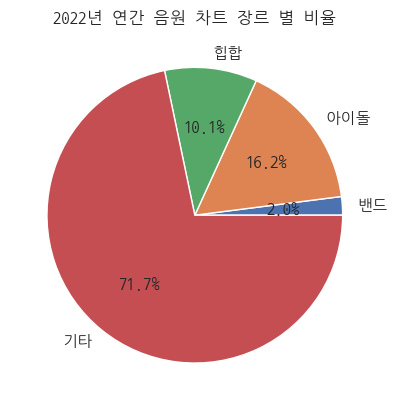

In [26]:
genres = ['밴드','아이돌','힙합','기타']

genre_sum = [melon_chart_2022_df[melon_chart_2022_df['genre']==genre]['artist'].count() for genre in genres]

plt.title("2022년 연간 음원 차트 장르 별 비율")
plt.pie(genre_sum, labels = genres, autopct='%.1f%%')

([<matplotlib.patches.Wedge at 0x1ffd8c5f490>,
 [Text(1.064743570582315, 0.2762627895747505, '밴드'),
  Text(0.3266123947309904, 1.0503924712259165, '아이돌'),
  Text(-0.5499998283967124, 0.9526280432380663, '힙합'),
  Text(-0.5194982855337378, -0.9695986444542439, '기타')],
 [Text(0.5807692203176263, 0.15068879431350024, '8.1%'),
  Text(0.17815221530781292, 0.5729413479414089, '24.2%'),
  Text(-0.29999990639820673, 0.5196152963116725, '2.0%'),
  Text(-0.2833627012002206, -0.528871987884133, '65.7%')])

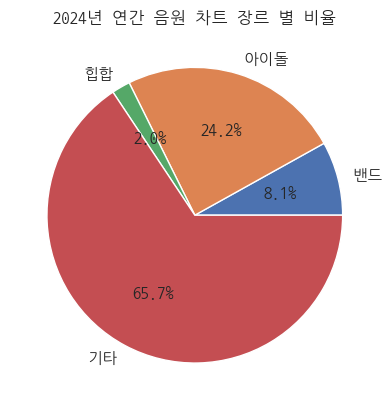

In [27]:
genres = ['밴드','아이돌','힙합','기타']

genre_sum = [melon_chart_2024_df[melon_chart_2024_df['genre']==genre]['artist'].count() for genre in genres]

plt.title("2024년 연간 음원 차트 장르 별 비율")
plt.pie(genre_sum, labels = genres, autopct='%.1f%%')

C:\Users\8804w\AppData\Local\Temp\ipykernel_19224\3268929213.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  genre_sum = [melon_chart_2024_df[melon_chart_now_df['genre']==genre]['artist'].count() for genre in genres]
C:\Users\8804w\AppData\Local\Temp\ipykernel_19224\3268929213.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  genre_sum = [melon_chart_2024_df[melon_chart_now_df['genre']==genre]['artist'].count() for genre in genres]
C:\Users\8804w\AppData\Local\Temp\ipykernel_19224\3268929213.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  genre_sum = [melon_chart_2024_df[melon_chart_now_df['genre']==genre]['artist'].count() for genre in genres]
C:\Users\8804w\AppData\Local\Temp\ipykernel_19224\3268929213.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  genre_sum = [melon_chart_2024_df[melon_chart_now_df['genre']==genre]['artist'].count() for genre

([<matplotlib.patches.Wedge at 0x1ffd8f620d0>,
 [Text(1.0336618754725804, 0.3762221779673655, '밴드'),
  Text(0.4884732149217053, 0.9855931809342299, '아이돌'),
  Text(0.017452389460005536, 1.0998615431508352, '힙합'),
  Text(-0.7716220074342317, -0.7839639517498026, '기타')],
 [Text(0.5638155684395892, 0.20521209707310845, '11.1%'),
  Text(0.26643993541183925, 0.5375962805095799, '13.1%'),
  Text(0.009519485160003017, 0.5999244780822737, '1.0%'),
  Text(-0.4208847313277627, -0.4276167009544377, '74.7%')])

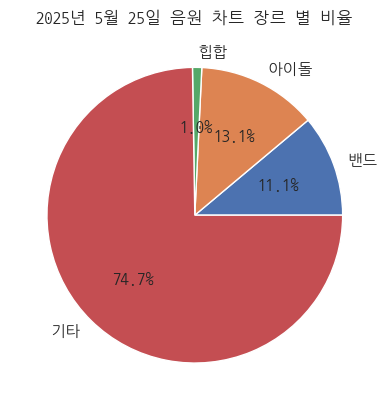

In [28]:
genres = ['밴드','아이돌','힙합','기타']

genre_sum = [melon_chart_2024_df[melon_chart_now_df['genre']==genre]['artist'].count() for genre in genres]

plt.title("2025년 5월 25일 음원 차트 장르 별 비율")
plt.pie(genre_sum, labels = genres, autopct='%.1f%%')

- 음원 차트에서 힙합은 점유율 하락
- 밴드의 점유율은 꾸준히 상승

In [29]:
melon_chart_2022_df['artist'].value_counts()[:5]

artist
아이유      6
에스파      5
방탄소년단    5
임영웅      5
비오       4
Name: count, dtype: int64

In [30]:
melon_chart_2024_df['artist'].value_counts()[:5]

artist
임영웅     10
뉴진스      8
아이브      6
에스파      6
데이식스     4
Name: count, dtype: int64

In [31]:
melon_chart_now_df['artist'].value_counts()[:5]

artist
임영웅            13
데이식스            6
G-DRAGON        5
RIIZE           5
BOYNEXTDOOR     4
Name: count, dtype: int64

In [32]:
artists_2022.sort_values('num', ascending=False)[:5]

,artist,num,genre
28,아이브,13,아이돌
67,싸이,10,기타
46,보라미유,9,기타
3,지코,9,힙합
1,윤하,9,기타


In [33]:
artists_2024.sort_values('num', ascending=False)[:5]

,artist,num,genre
3,창모,6,힙합
27,지코,5,힙합
8,프로미스나인,4,아이돌
2,르세라핌,4,아이돌
17,하이라이트,4,아이돌


In [34]:
artists_2025.sort_values('num', ascending=False)[1:6]

,artist,num,genre
16,싸이,15,기타
4,루시,13,밴드
19,YB,13,밴드
20,리센느,12,기타
81,권은비,12,아이돌


**2022년 멀티 차트인 아티스트 순위**

| 아이유 | 6곡 |
| --- | --- |
| 방탄소년단 | 5곡 |
| 임영웅 | 5곡 |
| 에스파 | 5곡 |
| 비오 | 4곡 |

**2024년 멀티 차트인 아티스트 순위**

| 임영웅 | 10곡 |
| --- | --- |
| 뉴진스 | 8곡 |
| 아이브 | 6곡 |
| 에스파 | 6곡 |
| 데이식스 | 4곡 |

**2025년 멀티 차트인 아티스트 순위(2025.05.25 실시간 차트 기준)**

| 임영웅 | 13곡 |
| --- | --- |
| 데이식스 | 6곡 |
| RIIZE | 5곡 |
| G-DRAGON | 5곡 |
| BOYNEXTDOOR | 4곡 |
- 하지만 아직 데이식스 정도를 제외하고는 음원 차트에서 크게 힘을 쓰지는 못하고 있음

## 락과 밴드의 티켓 파워(2024.06~2025.03)

In [35]:
concert_2024_06 = pd.read_csv('./data/KC_KOPIS_ADVANTK_STTBRD_INFO_202406.csv').drop(['PBLPRFR_BEGIN_DE', 'PBLPRFR_END_DE', 'AREA_NM', 'PBLPRFR_PLACE_NM', 'RDNMADR_NM', 'LC_LA', 'LC_LO'], axis=1)
concert_2024_07 = pd.read_csv('./data/KC_KOPIS_ADVANTK_STTBRD_INFO_202407.csv').drop(['PBLPRFR_BEGIN_DE', 'PBLPRFR_END_DE', 'AREA_NM', 'PBLPRFR_PLACE_NM', 'RDNMADR_NM', 'LC_LA', 'LC_LO'], axis=1)
concert_2024_08 = pd.read_csv('./data/KC_KOPIS_ADVANTK_STTBRD_INFO_202408.csv').drop(['PBLPRFR_BEGIN_DE', 'PBLPRFR_END_DE', 'AREA_NM', 'PBLPRFR_PLACE_NM', 'RDNMADR_NM', 'LC_LA', 'LC_LO'], axis=1)
concert_2024_09 = pd.read_csv('./data/KC_KOPIS_ADVANTK_STTBRD_INFO_202409.csv').drop(['PBLPRFR_BEGIN_DE', 'PBLPRFR_END_DE', 'AREA_NM', 'PBLPRFR_PLACE_NM', 'RDNMADR_NM', 'LC_LA', 'LC_LO'], axis=1)
concert_2024_10 = pd.read_csv('./data/KC_KOPIS_ADVANTK_STTBRD_INFO_202410.csv').drop(['PBLPRFR_BEGIN_DE', 'PBLPRFR_END_DE', 'AREA_NM', 'PBLPRFR_PLACE_NM', 'RDNMADR_NM', 'LC_LA', 'LC_LO'], axis=1)
concert_2024_11 = pd.read_csv('./data/KC_KOPIS_ADVANTK_STTBRD_INFO_202411.csv').drop(['PBLPRFR_BEGIN_DE', 'PBLPRFR_END_DE', 'AREA_NM', 'PBLPRFR_PLACE_NM', 'RDNMADR_NM', 'LC_LA', 'LC_LO'], axis=1)
concert_2024_12 = pd.read_csv('./data/KC_KOPIS_ADVANTK_STTBRD_INFO_202412.csv').drop(['PBLPRFR_BEGIN_DE', 'PBLPRFR_END_DE', 'AREA_NM', 'PBLPRFR_PLACE_NM', 'RDNMADR_NM', 'LC_LA', 'LC_LO'], axis=1)
concert_2025_01 = pd.read_csv('./data/KC_KOPIS_ADVANTK_STTBRD_INFO_202501.csv').drop(['PBLPRFR_BEGIN_DE', 'PBLPRFR_END_DE', 'AREA_NM', 'PBLPRFR_PLACE_NM', 'RDNMADR_NM', 'LC_LA', 'LC_LO'], axis=1)
concert_2025_02 = pd.read_csv('./data/KC_KOPIS_ADVANTK_STTBRD_INFO_202502.csv').drop(['PBLPRFR_BEGIN_DE', 'PBLPRFR_END_DE', 'AREA_NM', 'PBLPRFR_PLACE_NM', 'RDNMADR_NM', 'LC_LA', 'LC_LO'], axis=1)
concert_2025_03 = pd.read_csv('./data/KC_KOPIS_ADVANTK_STTBRD_INFO_202503.csv').drop(['PBLPRFR_BEGIN_DE', 'PBLPRFR_END_DE', 'AREA_NM', 'PBLPRFR_PLACE_NM', 'RDNMADR_NM', 'LC_LA', 'LC_LO'], axis=1)

In [36]:
concert_2024_06['YM'] = '202406'
concert_2024_07['YM'] = '202407'
concert_2024_08['YM'] = '202408'
concert_2024_09['YM'] = '202409'
concert_2024_10['YM'] = '202410'
concert_2024_11['YM'] = '202411'
concert_2024_12['YM'] = '202412'
concert_2025_01['YM'] = '202501'
concert_2025_02['YM'] = '202502'
concert_2025_03['YM'] = '202503'

In [37]:
concerts = pd.concat([concert_2024_06, concert_2024_07, concert_2024_08, concert_2024_09, concert_2024_10, concert_2024_11, concert_2024_12, concert_2025_01, concert_2025_02, concert_2025_03])

In [38]:
display(concerts[concerts['GENRE_NM'] == '대중음악'])

,RANK_CO,PBLPRFR_NM,GENRE_NM,YM
0,1,싸이 흠뻑쇼: SUMMER SWAG [부산],대중음악,202406
1,2,싸이흠뻑쇼: SUMMER SWAG [인천],대중음악,202406
2,3,싸이 흠뻑쇼: SUMMER SWAG [수원],대중음악,202406
4,5,싸이흠뻑쇼: SUMMERSWAG [과천],대중음악,202406
5,6,싸이 흠뻑쇼: SUMMER SWAG [대구],대중음악,202406
...,...,...,...,...
44,45,현역가왕2 전국투어 콘서트 [전주],대중음악,202503
45,46,미스터트롯3 전국투어 콘서트 [수원],대중음악,202503
47,48,EDC KOREA,대중음악,202503
48,49,TEN CONCERT: 1001 MOVEMENT: STUNNER [서울],대중음악,202503


**2024년 06월 공연 예매 랭킹**

| 인천 펜타포트 락 페스티벌 | 20위 |
| --- | --- |

**2024년 07월 공연 예매 랭킹**

| 잔나비 | 6위, 29위 |
| --- | --- |
| 넬 | 39위 |

**2024년 08월 공연 예매 랭킹**

| 데이식스 | 2위 |
| --- | --- |
| 루시 | 8위 |
| 부산 국제 록페스티벌 | 24위 |

**2024년 11월 공연 예매 랭킹**

| 오아시스 | 2위 |
| --- | --- |
| 데이식스 | 5위 |

**2025년 01월 공연 예매 랭킹**

| 데이식스 | 13위 |
| --- | --- |
| 검정치마 | 18위 |

**2025년 02월 공연 예매 랭킹**

| 데이식스 | 9위, 10위, 13위 |
| --- | --- |
| 엔플라잉 | 48위 |

**2025년 03월 공연 예매 랭킹**

| 피크 페스티벌 | 27위 |
| --- | --- |
| 엔플라잉 | 30위 |
| 넬 | 38위 |
- 총합하여 총 18회 랭킹에 들었음
- 데이식스가 총 6회 랭킹에 들었음
    - 총 18회 중 6회를 데이식스가 차지
    - 2024년 한해동안 콘서트에 가장 많은 관객을 끌어들인 아티스트 TOP 10 중 데이식스가 6위로 선정(109,333)명
    - 밴드의 붐이라기 보다는 데이식스의 인기가 많다는 생각이 듦
- 하지만 데이식스 이외에도 잔나비, 넬, 루시, 검정치마, 엔플라잉 등의 밴드들이 순위권에 포함
    - 데이식스만큼은 아니지만 다양한 밴드들의 공연이 많은 관심을 받음
- 각종 록 페스티벌이 총 3회 랭킹에 들었음
    - 다양한 악기들과 장비들이 필요한 밴드의 특성 상 작은 무대보다는 큰 무대가 어울리고 이런 점이 음악 페스티벌과 어울림
    - 락이나 밴드라는 분야 자체에 관심을 가지는 사람들도 어느정도 있다

## 결론

### 인디 밴드와 대중

- 대학 축제에 참가하는 밴드들의 비율이 해마다 상승 중
- 반대로 래퍼들의 비율은 크게 감소
- 아이돌과 발라더는 꾸준한 수요가 있음
- 기존 래퍼들의 빈자리를 밴드가 채워가는 것 같음

### 아쉬운 점

- 힙합은 쇼미더머니라는 프로그램이 대중화에 엄청난 기여를 함
- 비록 쇼미더머니가 힙합씬을 올바른 방향으로 이끌었는지에 대한 의견은 분분하지만 적어도 힙합의 대중화에 엄청난 기여를 했다는 것은 이견의 여지가 없음
- 하지만 밴드는 이런 요소가 없는 것이 아쉬움
- 슈퍼밴드, TOP밴드 등의 경연 프로그램이 있었으나 쇼미더머니만큼의 반응을 얻지는 못 함

### 아직은 밴드 붐이라고 하기에는 시기상조?

- 음원 차트에서는 데이식스 정도를 제외하면 크게 힘을 쓰는 밴드가 많이 없음
- 하지만 대학축제에서는 데이식스, 엔플라잉, 루시처럼 대중적인 밴드 이외에도 유다빈밴드, 너드커넥션, 실리카겔 같은 인디 밴드들도 꽤 자주 참가
- 팬덤의 영향이 큰 음원 차트에서는 큰 힘을 쓰지 못하지만 락, 밴드라는 장르 자체를 좋아하는 사람이 많아지는 것은 맞는 것 같음

### 그러니까 루시 노래 들어주세요

- [개화](https://www.youtube.com/watch?v=7qvrRWMXY-8)
- [낙화](https://www.youtube.com/watch?v=8Jp48kihHtA)
- [못 죽는 기사와 비단 요람](https://www.youtube.com/watch?v=y7jrpS8GHxs)